In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN
import numpy as np

## Clean des données de loyers

In [2]:
loyer_maison = pd.read_csv('C:/Users/kelia/prix_immo1_.csv')
loyer_app_3pieces = pd.read_csv('C:/Users/kelia/prix_immo2_.csv')
loyer_app_12pieces = pd.read_csv('C:/Users/kelia/prix_immo3_.csv')
loyer_app = pd.read_csv('C:/Users/kelia/prix_immo4_.csv')
loyer_maison

,Unnamed: 0,id_zone,insee_c,dep,libgeo,epci,reg,loypredm2,lwr_ip_m2,upr_ip_m2,typpred,nbobs_com,nbobs_mail,r2_adj
0,0,1.0,52165,52,Dancevoir,245200597,44,6.294696,4.824998,8.212066,maille,15,473,0.716930
1,1,1.0,21115,21,Buncey,242101434,27,6.294696,4.824998,8.212066,maille,24,473,0.716930
2,2,1.0,21154,21,Châtillon-sur-Seine,242101434,27,7.612492,5.835208,9.931100,commune,221,473,0.716930
3,3,1.0,52526,52,Villars-Santenoge,200027308,44,6.294696,4.824998,8.212066,maille,3,473,0.716930
4,4,1.0,21519,21,Recey-sur-Ource,242101434,27,6.294696,4.824998,8.212066,maille,10,473,0.716930
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34965,34965,NaN,97305,973,Macouria,249730045,3,13.316857,10.073813,17.603929,commune,523,619,0.730710
34966,34966,NaN,97314,973,Ouanary,249730052,3,11.519445,8.671557,15.302627,maille,0,619,0.730710
34967,34967,NaN,97308,973,Saint-Georges,249730052,3,11.519445,8.671557,15.302627,maille,5,619,0.730710
34968,34968,NaN,97313,973,Montsinéry-Tonnegrande,249730045,3,11.519445,8.671557,15.302627,maille,28,619,0.730710


In [3]:
print('NaN pour loyer_maison :', loyer_maison.isna().sum())
print('NaN pour loyer_app_3pieces :', loyer_app_3pieces.isna().sum())

NaN pour loyer_maison : Unnamed: 0     0
id_zone       54
insee_c        0
dep            0
libgeo         0
epci           0
reg            0
loypredm2      0
lwr_ip_m2      0
upr_ip_m2      0
typpred        0
nbobs_com      0
nbobs_mail     0
r2_adj         0
dtype: int64
NaN pour loyer_app_3pieces : Unnamed: 0     0
id_zone       54
insee_c        0
libgeo         0
epci           0
dep            0
reg            0
loypredm2      0
lwr_ip_m2      0
upr_ip_m2      0
typpred        0
nbobs_com      0
nbobs_mail     0
r2_adj         0
dtype: int64


In [4]:
print('NaN pour loyer_app_12pieces :', loyer_app_12pieces.isna().sum())
print('NaN pour loyer_app :', loyer_app.isna().sum())

NaN pour loyer_app_12pieces : Unnamed: 0     0
id_zone       54
insee_c        0
libgeo         0
epci           0
dep            0
reg            0
loypredm2      0
lwr_ip_m2      0
upr_ip_m2      0
typpred        0
nbobs_com      0
nbobs_mail     0
r2_adj         0
dtype: int64
NaN pour loyer_app : Unnamed: 0     0
id_zone       54
insee_c        0
libgeo         0
epci           0
dep            0
reg            0
loypredm2      0
lwr_ip_m2      0
upr_ip_m2      0
typpred        0
nbobs_com      0
nbobs_mail     0
r2_adj         0
dtype: int64


In [5]:
#Retirer les colonnes qui represente les indeces des lignes

loyer_maison = loyer_maison.drop('Unnamed: 0', axis=1)
loyer_app_3pieces = loyer_app_3pieces.drop('Unnamed: 0', axis=1)
loyer_app_12pieces = loyer_app_12pieces.drop('Unnamed: 0', axis=1)
loyer_app = loyer_app.drop('Unnamed: 0', axis=1)

<Axes: ylabel='loypredm2'>

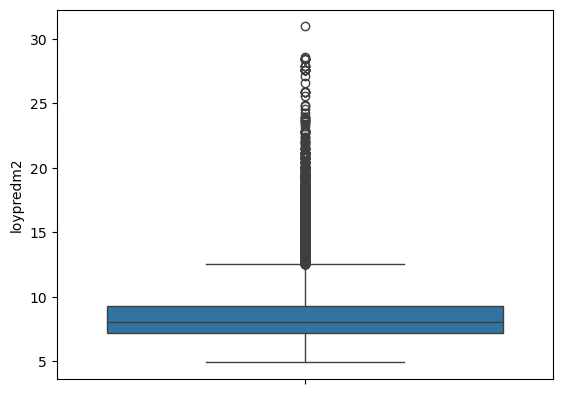

In [6]:
sns.boxplot(loyer_maison['loypredm2'])

<Axes: ylabel='loypredm2'>

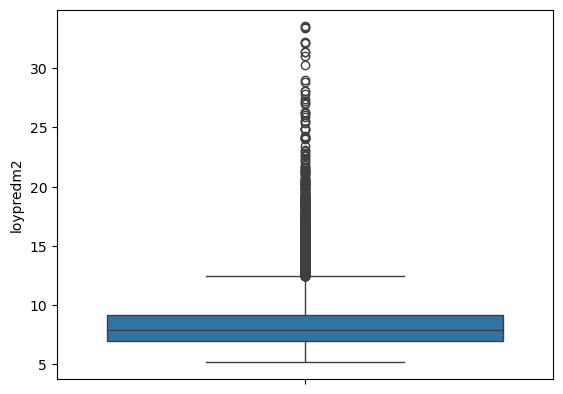

In [7]:
sns.boxplot(loyer_app_3pieces['loypredm2'])

<Axes: ylabel='loypredm2'>

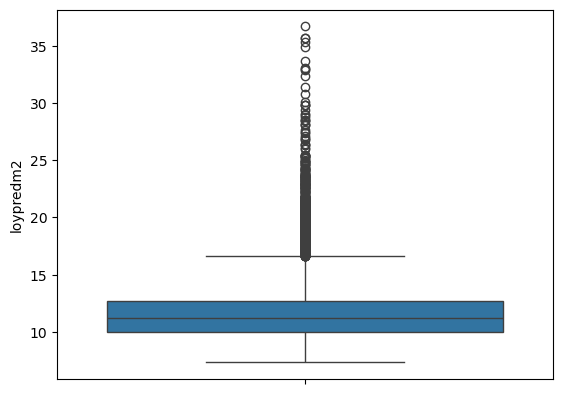

In [8]:
sns.boxplot(loyer_app_12pieces['loypredm2'])

<Axes: ylabel='loypredm2'>

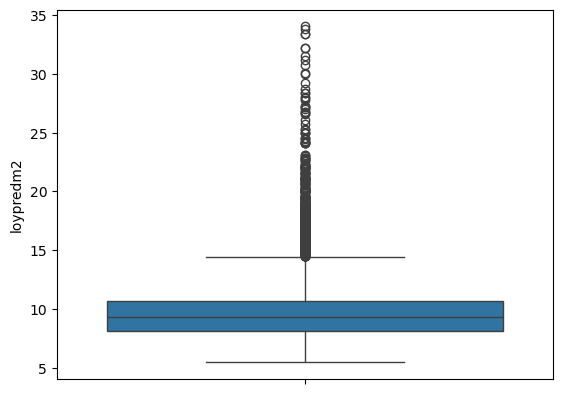

In [9]:
sns.boxplot(loyer_app['loypredm2'])

In [10]:
Q1_maison = loyer_maison['loypredm2'].quantile(0.25)
Q3_maison = loyer_maison['loypredm2'].quantile(0.75)

iqr_maison = Q3_maison - Q1_maison

lower_limit = Q1_maison - iqr_maison * 1.5 
upper_limit = Q3_maison + iqr_maison * 1.5

loyer_maison_clean = loyer_maison[
    (loyer_maison['loypredm2'] >= lower_limit) & (loyer_maison['loypredm2'] <= upper_limit)
]

In [11]:
print(loyer_maison.shape)
print(loyer_maison_clean.shape)

(34970, 13)
(32976, 13)


<Axes: ylabel='loypredm2'>

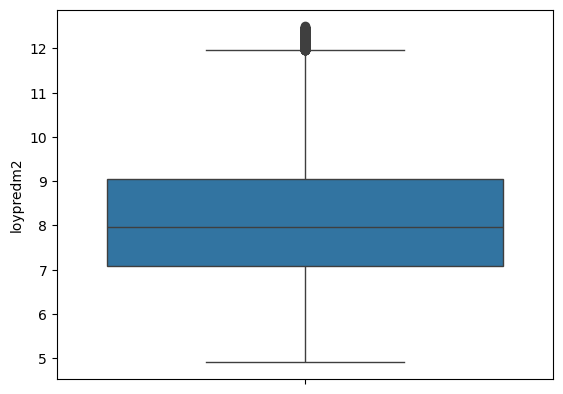

In [12]:
sns.boxplot(loyer_maison_clean['loypredm2'])

In [13]:
def remove_outliers_iqr(df, column):
    """
    Supprime les outliers d'une colonne specifique d'un DataFrame en utilisant l'IQR.
    """
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    iqr = Q3 - Q1
    lower_limit = Q1 - iqr * 1.5
    upper_limit = Q3 + iqr * 1.5
    return df[(df[column] >= lower_limit) & (df[column] <= upper_limit)]

In [14]:
loyer_app_3pieces_clean = remove_outliers_iqr(loyer_app_3pieces, 'loypredm2')
loyer_app_12pieces_clean = remove_outliers_iqr(loyer_app_12pieces, 'loypredm2')
loyer_app_clean = remove_outliers_iqr(loyer_app, 'loypredm2')

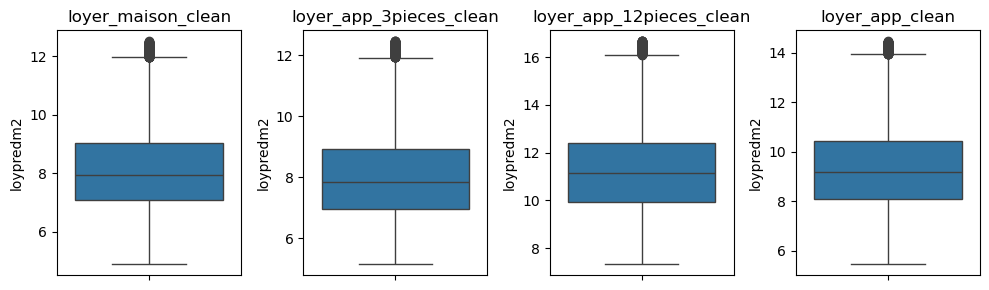

In [15]:
plt.figure(figsize=(10,3))

plt.subplot(141)
sns.boxplot(loyer_maison_clean['loypredm2'])
plt.title('loyer_maison_clean')

plt.subplot(142)
sns.boxplot(loyer_app_3pieces_clean['loypredm2'])
plt.title('loyer_app_3pieces_clean')

plt.subplot(143)
sns.boxplot(loyer_app_12pieces_clean['loypredm2'])
plt.title('loyer_app_12pieces_clean')

plt.subplot(144)
sns.boxplot(loyer_app_clean['loypredm2'])
plt.title('loyer_app_clean')

plt.tight_layout()
plt.show()

In [16]:
print(f'Donnees perdues en ayant clean maison : {loyer_maison.shape[0] - loyer_maison_clean.shape[0]}')
print(f'Donnees perdues en ayant clean app3 : {loyer_app_3pieces.shape[0] - loyer_app_3pieces_clean.shape[0]}')
print(f'Donnees perdues en ayant clean app12 : {loyer_app_12pieces.shape[0] - loyer_app_12pieces_clean.shape[0]}')
print(f'Donnees perdues en ayant clean app : {loyer_app.shape[0] - loyer_app_clean.shape[0]}')

Données perdues en ayant clean maison : 1994
Données perdues en ayant clean app3 : 1575
Données perdues en ayant clean app12 : 1431
Données perdues en ayant clean app : 1343


In [17]:
loyer_maison_clean.columns

Index(['id_zone', 'insee_c', 'dep', 'libgeo', 'epci', 'reg', 'loypredm2',
       'lwr_ip_m2', 'upr_ip_m2', 'typpred', 'nbobs_com', 'nbobs_mail',
       'r2_adj'],
      dtype='object')

In [18]:
loyer_maison_clean = loyer_maison_clean.drop('id_zone', axis=1)
loyer_app_3pieces_clean = loyer_app_3pieces_clean.drop('id_zone', axis=1)
loyer_app_12pieces_clean = loyer_app_12pieces_clean.drop('id_zone', axis=1)
loyer_app_clean = loyer_app_clean.drop('id_zone', axis=1)

loyer_maison_clean

,insee_c,dep,libgeo,epci,reg,loypredm2,lwr_ip_m2,upr_ip_m2,typpred,nbobs_com,nbobs_mail,r2_adj
0,52165,52,Dancevoir,245200597,44,6.294696,4.824998,8.212066,maille,15,473,0.71693
1,21115,21,Buncey,242101434,27,6.294696,4.824998,8.212066,maille,24,473,0.71693
2,21154,21,Châtillon-sur-Seine,242101434,27,7.612492,5.835208,9.931100,commune,221,473,0.71693
3,52526,52,Villars-Santenoge,200027308,44,6.294696,4.824998,8.212066,maille,3,473,0.71693
4,21519,21,Recey-sur-Ource,242101434,27,6.294696,4.824998,8.212066,maille,10,473,0.71693
...,...,...,...,...,...,...,...,...,...,...,...,...
34963,97310,973,Roura,249730045,3,11.519445,8.671557,15.302627,maille,63,619,0.73071
34964,97356,973,Camopi,249730052,3,11.519445,8.671557,15.302627,maille,0,619,0.73071
34966,97314,973,Ouanary,249730052,3,11.519445,8.671557,15.302627,maille,0,619,0.73071
34967,97308,973,Saint-Georges,249730052,3,11.519445,8.671557,15.302627,maille,5,619,0.73071


In [19]:
loyer_maison_clean = loyer_maison_clean.drop(['epci', 'nbobs_com', 'nbobs_mail', 'r2_adj', 'dep', 'reg', 'typpred'], axis=1)
loyer_app_3pieces_clean = loyer_app_3pieces_clean.drop(['epci', 'nbobs_com', 'nbobs_mail', 'r2_adj', 'dep', 'reg', 'typpred'], axis=1)
loyer_app_12pieces_clean = loyer_app_12pieces_clean.drop(['epci', 'nbobs_com', 'nbobs_mail', 'r2_adj', 'dep', 'reg','typpred'], axis=1)
loyer_app_clean = loyer_app_clean.drop(['epci', 'nbobs_com', 'nbobs_mail', 'r2_adj', 'dep', 'reg', 'typpred'], axis=1)

loyer_maison_clean

,insee_c,libgeo,loypredm2,lwr_ip_m2,upr_ip_m2
0,52165,Dancevoir,6.294696,4.824998,8.212066
1,21115,Buncey,6.294696,4.824998,8.212066
2,21154,Châtillon-sur-Seine,7.612492,5.835208,9.931100
3,52526,Villars-Santenoge,6.294696,4.824998,8.212066
4,21519,Recey-sur-Ource,6.294696,4.824998,8.212066
...,...,...,...,...,...
34963,97310,Roura,11.519445,8.671557,15.302627
34964,97356,Camopi,11.519445,8.671557,15.302627
34966,97314,Ouanary,11.519445,8.671557,15.302627
34967,97308,Saint-Georges,11.519445,8.671557,15.302627


## Ajout des données de cities dans les données de loyers

In [20]:
ville_france = pd.read_csv('C:/Users/kelia/Downloads/cities.csv')
ville_france

,insee_code,city_code,zip_code,label,latitude,longitude,department_name,department_number,region_name,region_geojson_name
0,25620,ville du pont,25650,ville du pont,46.999873,6.498147,doubs,25,bourgogne-franche-comté,Bourgogne-Franche-Comté
1,25624,villers grelot,25640,villers grelot,47.361512,6.235167,doubs,25,bourgogne-franche-comté,Bourgogne-Franche-Comté
2,25615,villars les blamont,25310,villars les blamont,47.368384,6.871415,doubs,25,bourgogne-franche-comté,Bourgogne-Franche-Comté
3,25619,les villedieu,25240,les villedieu,46.713906,6.265831,doubs,25,bourgogne-franche-comté,Bourgogne-Franche-Comté
4,25622,villers buzon,25170,villers buzon,47.228558,5.852187,doubs,25,bourgogne-franche-comté,Bourgogne-Franche-Comté
...,...,...,...,...,...,...,...,...,...,...
39140,98829,thio,98829,thio,NaN,NaN,nouvelle-calédonie,988,nouvelle-calédonie,Nouvelle Calédonie
39141,98831,voh,98833,voh,NaN,NaN,nouvelle-calédonie,988,nouvelle-calédonie,Nouvelle Calédonie
39142,98832,yate,98834,yate,NaN,NaN,nouvelle-calédonie,988,nouvelle-calédonie,Nouvelle Calédonie
39143,98612,sigave,98620,sigave,-14.270411,-178.155263,wallis-et-futuna,986,wallis-et-futuna,Wallis-et-Futuna


In [21]:
ville_france.isna().sum()

insee_code               0
city_code                0
zip_code                 0
label                    0
latitude               211
longitude              211
department_name          0
department_number        0
region_name              0
region_geojson_name      0
dtype: int64

In [22]:
ville_france_clean = ville_france.dropna(axis=0)
print(f'Verification du nombre de lignes qui ont ete supprimees : {ville_france.shape[0] - ville_france_clean.shape[0]}')

Vérification du nombre de lignes qui ont été supprimées : 211


In [23]:
if set(ville_france_clean['city_code']) == set(ville_france_clean['label']):
    print("Les colonnes contiennent les memes valeurs (independamment de l'ordre).")
else:
    print("Les colonnes ne contiennent pas les memes valeurs.")

Les colonnes ne contiennent pas les mêmes valeurs.


In [ ]:
diff = ville_france_clean['city_code'].compare(ville_france_clean['label'])
diff

,self,other
50,st firmin,st firmin en valgodemard
568,grancey le chateau neuvelle,grancey le chateau
591,montigny mornay villeneuve vingeanne,montigny mornay villeneuve vinge
592,montigny mornay villeneuve vingeanne,montigny mornay villeneuve vinge
791,montigny mornay villeneuve vingeanne,montigny mornay villeneuve vinge
...,...,...
38804,papaichton,pompidou papa ichton
38817,macouria,macouria tonate
38905,miquelon langlade,st pierre et miquelon
38906,st pierre,st pierre et miquelon


In [25]:
ville_france_clean = ville_france_clean.drop(['zip_code', 'region_name'], axis=1)
ville_france_clean.columns

Index(['insee_code', 'city_code', 'label', 'latitude', 'longitude',
       'department_name', 'department_number', 'region_geojson_name'],
      dtype='object')

#### Ajout des colonnes de cities dans loyer_maison_clean

In [26]:
loyer_maison_clean_ville = loyer_maison_clean.merge(ville_france_clean, left_on='insee_c', right_on='insee_code')

In [27]:
loyer_maison_clean_ville

,insee_c,libgeo,loypredm2,lwr_ip_m2,upr_ip_m2,insee_code,city_code,label,latitude,longitude,department_name,department_number,region_geojson_name
0,52165,Dancevoir,6.294696,4.824998,8.212066,52165,dancevoir,dancevoir,47.933736,4.879551,haute-marne,52,Grand Est
1,21115,Buncey,6.294696,4.824998,8.212066,21115,buncey,buncey,47.817619,4.576870,côte-d'or,21,Bourgogne-Franche-Comté
2,21154,Châtillon-sur-Seine,7.612492,5.835208,9.931100,21154,chatillon sur seine,chatillon sur seine,47.858369,4.591959,côte-d'or,21,Bourgogne-Franche-Comté
3,52526,Villars-Santenoge,6.294696,4.824998,8.212066,52526,villars santenoge,villars santenoge,47.744577,4.999362,haute-marne,52,Grand Est
4,52526,Villars-Santenoge,6.294696,4.824998,8.212066,52526,villars santenoge,villars santenoge,47.744577,4.999362,haute-marne,52,Grand Est
...,...,...,...,...,...,...,...,...,...,...,...,...,...
33318,97310,Roura,11.519445,8.671557,15.302627,97310,roura,roura,4.464026,-52.513230,guyane,973,Guyane
33319,97356,Camopi,11.519445,8.671557,15.302627,97356,camopi,camopi,2.838066,-52.796517,guyane,973,Guyane
33320,97314,Ouanary,11.519445,8.671557,15.302627,97314,ouanary,ouanary,4.210750,-51.747463,guyane,973,Guyane
33321,97308,Saint-Georges,11.519445,8.671557,15.302627,97308,st georges,st georges,3.741826,-52.132609,guyane,973,Guyane


In [28]:
loyer_maison_clean_ville = loyer_maison_clean_ville.drop(['city_code', 'label', 'insee_code'], axis=1)
loyer_maison_clean_ville

,insee_c,libgeo,loypredm2,lwr_ip_m2,upr_ip_m2,latitude,longitude,department_name,department_number,region_geojson_name
0,52165,Dancevoir,6.294696,4.824998,8.212066,47.933736,4.879551,haute-marne,52,Grand Est
1,21115,Buncey,6.294696,4.824998,8.212066,47.817619,4.576870,côte-d'or,21,Bourgogne-Franche-Comté
2,21154,Châtillon-sur-Seine,7.612492,5.835208,9.931100,47.858369,4.591959,côte-d'or,21,Bourgogne-Franche-Comté
3,52526,Villars-Santenoge,6.294696,4.824998,8.212066,47.744577,4.999362,haute-marne,52,Grand Est
4,52526,Villars-Santenoge,6.294696,4.824998,8.212066,47.744577,4.999362,haute-marne,52,Grand Est
...,...,...,...,...,...,...,...,...,...,...
33318,97310,Roura,11.519445,8.671557,15.302627,4.464026,-52.513230,guyane,973,Guyane
33319,97356,Camopi,11.519445,8.671557,15.302627,2.838066,-52.796517,guyane,973,Guyane
33320,97314,Ouanary,11.519445,8.671557,15.302627,4.210750,-51.747463,guyane,973,Guyane
33321,97308,Saint-Georges,11.519445,8.671557,15.302627,3.741826,-52.132609,guyane,973,Guyane


In [29]:
cols = ['insee_c', 'loypredm2', 'lwr_ip_m2', 'upr_ip_m2', 'libgeo', 'department_name', 'department_number', 'region_geojson_name', 'latitude', 'longitude']
loyer_maison_clean_ville = loyer_maison_clean_ville[cols]
loyer_maison_clean_ville

,insee_c,loypredm2,lwr_ip_m2,upr_ip_m2,libgeo,department_name,department_number,region_geojson_name,latitude,longitude
0,52165,6.294696,4.824998,8.212066,Dancevoir,haute-marne,52,Grand Est,47.933736,4.879551
1,21115,6.294696,4.824998,8.212066,Buncey,côte-d'or,21,Bourgogne-Franche-Comté,47.817619,4.576870
2,21154,7.612492,5.835208,9.931100,Châtillon-sur-Seine,côte-d'or,21,Bourgogne-Franche-Comté,47.858369,4.591959
3,52526,6.294696,4.824998,8.212066,Villars-Santenoge,haute-marne,52,Grand Est,47.744577,4.999362
4,52526,6.294696,4.824998,8.212066,Villars-Santenoge,haute-marne,52,Grand Est,47.744577,4.999362
...,...,...,...,...,...,...,...,...,...,...
33318,97310,11.519445,8.671557,15.302627,Roura,guyane,973,Guyane,4.464026,-52.513230
33319,97356,11.519445,8.671557,15.302627,Camopi,guyane,973,Guyane,2.838066,-52.796517
33320,97314,11.519445,8.671557,15.302627,Ouanary,guyane,973,Guyane,4.210750,-51.747463
33321,97308,11.519445,8.671557,15.302627,Saint-Georges,guyane,973,Guyane,3.741826,-52.132609


In [30]:
loyer_maison_clean_ville.isna().sum()

insee_c                0
loypredm2              0
lwr_ip_m2              0
upr_ip_m2              0
libgeo                 0
department_name        0
department_number      0
region_geojson_name    0
latitude               0
longitude              0
dtype: int64

#### Ajout des colonnes de cities dans loyer_app_3pieces_clean

In [31]:
loyer_app_3pieces_clean_ville = loyer_app_3pieces_clean.merge(ville_france_clean, left_on='insee_c', right_on='insee_code')

loyer_app_3pieces_clean_ville = loyer_app_3pieces_clean_ville.drop(['city_code', 'label', 'insee_code'], axis=1)

cols = ['insee_c', 'loypredm2', 'lwr_ip_m2', 'upr_ip_m2', 'libgeo', 'department_name', 'department_number', 'region_geojson_name', 'latitude', 'longitude']
loyer_app_3pieces_clean_ville = loyer_app_3pieces_clean_ville[cols]
loyer_app_3pieces_clean_ville

,insee_c,loypredm2,lwr_ip_m2,upr_ip_m2,libgeo,department_name,department_number,region_geojson_name,latitude,longitude
0,68140,9.953465,7.872362,12.584719,Hirtzfelden,haut-rhin,68,Grand Est,47.909807,7.446847
1,68241,9.953465,7.872362,12.584719,Oberentzen,haut-rhin,68,Grand Est,47.937318,7.381704
2,68030,9.953465,7.872362,12.584719,Bergholtzzell,haut-rhin,68,Grand Est,47.927108,7.225936
3,68228,9.953465,7.872362,12.584719,Munwiller,haut-rhin,68,Grand Est,47.934187,7.347715
4,68029,9.953465,7.872362,12.584719,Bergholtz,haut-rhin,68,Grand Est,47.920333,7.248452
...,...,...,...,...,...,...,...,...,...,...
33692,97106,11.245788,8.630185,14.654117,Bouillante,guadeloupe,971,Guadeloupe,16.143779,-61.754210
33693,97106,11.245788,8.630185,14.654117,Bouillante,guadeloupe,971,Guadeloupe,16.143779,-61.754210
33694,97130,11.245788,8.630185,14.654117,Terre-de-Bas,guadeloupe,971,Guadeloupe,15.854458,-61.633866
33695,97131,11.245788,8.630185,14.654117,Terre-de-Haut,guadeloupe,971,Guadeloupe,15.861955,-61.586221


In [32]:
loyer_app_3pieces_clean_ville.isna().sum()

insee_c                0
loypredm2              0
lwr_ip_m2              0
upr_ip_m2              0
libgeo                 0
department_name        0
department_number      0
region_geojson_name    0
latitude               0
longitude              0
dtype: int64

#### Ajout des colonnes de cities dans loyer_app_12pieces_clean

In [33]:
loyer_app_12pieces_clean_ville = loyer_app_12pieces_clean.merge(ville_france_clean, left_on='insee_c', right_on='insee_code')

loyer_app_12pieces_clean_ville = loyer_app_12pieces_clean_ville.drop(['city_code', 'label', 'insee_code'], axis=1)

cols = ['insee_c', 'loypredm2', 'lwr_ip_m2', 'upr_ip_m2', 'libgeo', 'department_name', 'department_number', 'region_geojson_name', 'latitude', 'longitude']
loyer_app_12pieces_clean_ville = loyer_app_12pieces_clean_ville[cols]

loyer_app_12pieces_clean_ville

,insee_c,loypredm2,lwr_ip_m2,upr_ip_m2,libgeo,department_name,department_number,region_geojson_name,latitude,longitude
0,36077,9.189967,7.199931,11.730041,Fontguenand,indre,36,Centre-Val de Loire,47.202090,1.534587
1,36092,9.189967,7.199931,11.730041,Langé,indre,36,Centre-Val de Loire,47.073829,1.508222
2,36123,9.189967,7.199931,11.730041,Mézières-en-Brenne,indre,36,Centre-Val de Loire,46.812370,1.256109
3,36013,9.189967,7.199931,11.730041,Baudres,indre,36,Centre-Val de Loire,47.052443,1.572692
4,36229,9.189967,7.199931,11.730041,Val-Fouzon,indre,36,Centre-Val de Loire,47.202294,1.627793
...,...,...,...,...,...,...,...,...,...,...
33875,97357,15.769400,12.293870,20.227476,Grand-Santi,guyane,973,Guyane,4.389246,-54.186330
33876,97306,15.769400,12.293870,20.227476,Mana,guyane,973,Guyane,4.991233,-53.645464
33877,97306,15.769400,12.293870,20.227476,Mana,guyane,973,Guyane,4.991233,-53.645464
33878,97360,15.769400,12.293870,20.227476,Apatou,guyane,973,Guyane,4.830256,-54.269343


In [34]:
loyer_app_12pieces_clean_ville.isna().sum()

insee_c                0
loypredm2              0
lwr_ip_m2              0
upr_ip_m2              0
libgeo                 0
department_name        0
department_number      0
region_geojson_name    0
latitude               0
longitude              0
dtype: int64

#### Ajout des colonnes de cities dans loyer_app_clean

In [35]:
loyer_app_clean_ville = loyer_app_clean.merge(ville_france_clean, left_on='insee_c', right_on='insee_code')

loyer_app_clean_ville = loyer_app_clean_ville.drop(['city_code', 'label', 'insee_code'], axis=1)

cols = ['insee_c', 'loypredm2', 'lwr_ip_m2', 'upr_ip_m2', 'libgeo', 'department_name', 'department_number', 'region_geojson_name', 'latitude', 'longitude']
loyer_app_clean_ville = loyer_app_clean_ville[cols]

loyer_app_clean_ville

,insee_c,loypredm2,lwr_ip_m2,upr_ip_m2,libgeo,department_name,department_number,region_geojson_name,latitude,longitude
0,64394,8.555667,7.054856,10.375752,Monpezat,pyrénées-atlantiques,64,Nouvelle-Aquitaine,43.501145,-0.063727
1,32450,8.555667,7.054856,10.375752,Tourdun,gers,32,Occitanie,43.547137,0.158533
2,64369,8.555667,7.054856,10.375752,Maspie-Lalonquère-Juillacq,pyrénées-atlantiques,64,Nouvelle-Aquitaine,43.425222,-0.147790
3,64552,8.555667,7.054856,10.375752,Vialer,pyrénées-atlantiques,64,Nouvelle-Aquitaine,43.508658,-0.178923
4,65174,8.555667,7.054856,10.375752,Estirac,hautes-pyrénées,65,Occitanie,43.499218,0.029271
...,...,...,...,...,...,...,...,...,...,...
33967,97360,12.284981,9.431030,16.002575,Apatou,guyane,973,Guyane,4.830256,-54.269343
33968,97361,12.284981,9.431030,16.002575,Awala-Yalimapo,guyane,973,Guyane,5.684288,-53.917368
33969,97306,12.284981,9.431030,16.002575,Mana,guyane,973,Guyane,4.991233,-53.645464
33970,97306,12.284981,9.431030,16.002575,Mana,guyane,973,Guyane,4.991233,-53.645464


In [36]:
loyer_app_clean_ville.isna().sum()

insee_c                0
loypredm2              0
lwr_ip_m2              0
upr_ip_m2              0
libgeo                 0
department_name        0
department_number      0
region_geojson_name    0
latitude               0
longitude              0
dtype: int64

#### Enregistrer les 4 tables en csv pour les envoyer dans bigquery

In [37]:
# # Enregistrer loyer_app_clean_ville
# loyer_app_clean_ville.to_csv('C:/Users/kelia/loyer_app_clean_ville.csv', index=False)

# # Enregistrer loyer_app_12pieces_clean_ville
# loyer_app_12pieces_clean_ville.to_csv('C:/Users/kelia/loyer_app_12pieces_clean_ville.csv', index=False)

# # Enregistrer loyer_app_3pieces_clean_ville
# loyer_app_3pieces_clean_ville.to_csv('C:/Users/kelia/loyer_app_3pieces_clean_ville.csv', index=False)

# # Enregistrer loyer_maison_clean_ville
# loyer_maison_clean_ville.to_csv('C:/Users/kelia/loyer_maison_clean_ville.csv', index=False)

## Clean des données de valeurs foncières

In [38]:
valeurs_foncieres = pd.read_csv('C:/Users/kelia/Downloads/full.csv')
valeurs_foncieres

C:\Users\kelia\AppData\Local\Temp\ipykernel_10544\2854353067.py:1: DtypeWarning: Columns (8,10,12,14,17,18,20,22,24,35,36) have mixed types. Specify dtype option on import or set low_memory=False.
  valeurs_foncieres = pd.read_csv('C:/Users/kelia/Downloads/full.csv')


,id_mutation,date_mutation,numero_disposition,nature_mutation,valeur_fonciere,adresse_numero,adresse_suffixe,adresse_nom_voie,adresse_code_voie,code_postal,...,type_local,surface_reelle_bati,nombre_pieces_principales,code_nature_culture,nature_culture,code_nature_culture_speciale,nature_culture_speciale,surface_terrain,longitude,latitude
0,2024-1,2024-01-02,1,Vente,346.5,NaN,NaN,LE DELIVRE,B020,1230.0,...,NaN,NaN,NaN,P,prés,NaN,NaN,99.0,5.530952,45.952439
1,2024-2,2024-01-03,2,Vente,10000.0,NaN,NaN,CHEVRY DESSOUS,B007,1170.0,...,NaN,NaN,NaN,S,sols,NaN,NaN,115.0,6.043339,46.282256
2,2024-3,2024-01-08,1,Vente,249000.0,NaN,NaN,PIN HAMEAU,B086,1290.0,...,NaN,NaN,NaN,S,sols,NaN,NaN,497.0,4.911143,46.247235
3,2024-4,2024-01-03,1,Vente,329500.0,29.0,NaN,PL DU JURA,0500,1170.0,...,Dépendance,NaN,0.0,NaN,NaN,NaN,NaN,NaN,6.058695,46.332212
4,2024-4,2024-01-03,1,Vente,329500.0,29.0,NaN,PL DU JURA,0500,1170.0,...,Dépendance,NaN,0.0,NaN,NaN,NaN,NaN,NaN,6.058695,46.332212
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1566638,2024-556071,2024-04-09,1,Vente,833000.0,60.0,NaN,RUE BRANCION,1255.0,75015.0,...,Dépendance,NaN,0.0,NaN,NaN,NaN,NaN,NaN,2.302765,48.832709
1566639,2024-556071,2024-04-09,1,Vente,833000.0,60.0,NaN,RUE BRANCION,1255.0,75015.0,...,Dépendance,NaN,0.0,NaN,NaN,NaN,NaN,NaN,2.302765,48.832709
1566640,2024-556071,2024-04-09,1,Vente,833000.0,60.0,NaN,RUE BRANCION,1255.0,75015.0,...,Appartement,100.0,4.0,NaN,NaN,NaN,NaN,NaN,2.302765,48.832709
1566641,2024-556072,2024-04-04,1,Adjudication,400000.0,5.0,NaN,RUE DE LA MAIN D OR,5920.0,75011.0,...,Appartement,60.0,2.0,NaN,NaN,NaN,NaN,NaN,2.378272,48.851470


In [39]:
valeurs_foncieres.columns

Index(['id_mutation', 'date_mutation', 'numero_disposition', 'nature_mutation',
       'valeur_fonciere', 'adresse_numero', 'adresse_suffixe',
       'adresse_nom_voie', 'adresse_code_voie', 'code_postal', 'code_commune',
       'nom_commune', 'code_departement', 'ancien_code_commune',
       'ancien_nom_commune', 'id_parcelle', 'ancien_id_parcelle',
       'numero_volume', 'lot1_numero', 'lot1_surface_carrez', 'lot2_numero',
       'lot2_surface_carrez', 'lot3_numero', 'lot3_surface_carrez',
       'lot4_numero', 'lot4_surface_carrez', 'lot5_numero',
       'lot5_surface_carrez', 'nombre_lots', 'code_type_local', 'type_local',
       'surface_reelle_bati', 'nombre_pieces_principales',
       'code_nature_culture', 'nature_culture', 'code_nature_culture_speciale',
       'nature_culture_speciale', 'surface_terrain', 'longitude', 'latitude'],
      dtype='object')

In [40]:
valeurs_foncieres.dtypes

id_mutation                      object
date_mutation                    object
numero_disposition                int64
nature_mutation                  object
valeur_fonciere                 float64
adresse_numero                  float64
adresse_suffixe                  object
adresse_nom_voie                 object
adresse_code_voie                object
code_postal                     float64
code_commune                     object
nom_commune                      object
code_departement                 object
ancien_code_commune             float64
ancien_nom_commune               object
id_parcelle                      object
ancien_id_parcelle              float64
numero_volume                    object
lot1_numero                      object
lot1_surface_carrez             float64
lot2_numero                      object
lot2_surface_carrez             float64
lot3_numero                      object
lot3_surface_carrez             float64
lot4_numero                      object


In [41]:
valeurs_foncieres_clean = valeurs_foncieres.drop(['adresse_numero', 
                                                  'adresse_suffixe', 
                                                  'adresse_nom_voie', 
                                                  'adresse_code_voie', 
                                                  'numero_volume', 
                                                  'lot1_numero', 
                                                  'lot1_surface_carrez', 
                                                  'lot2_numero', 
                                                  'lot2_surface_carrez', 
                                                  'lot3_numero', 
                                                  'lot3_surface_carrez', 
                                                  'lot4_numero', 
                                                  'lot4_surface_carrez', 
                                                  'lot5_numero', 
                                                  'lot5_surface_carrez', 
                                                  'code_nature_culture', 
                                                  'nature_culture', 
                                                  'code_nature_culture_speciale', 
                                                  'nature_culture_speciale'],
                                                  axis=1)
valeurs_foncieres_clean.columns

Index(['id_mutation', 'date_mutation', 'numero_disposition', 'nature_mutation',
       'valeur_fonciere', 'code_postal', 'code_commune', 'nom_commune',
       'code_departement', 'ancien_code_commune', 'ancien_nom_commune',
       'id_parcelle', 'ancien_id_parcelle', 'nombre_lots', 'code_type_local',
       'type_local', 'surface_reelle_bati', 'nombre_pieces_principales',
       'surface_terrain', 'longitude', 'latitude'],
      dtype='object')

In [42]:
valeurs_foncieres_clean.isna().sum()

id_mutation                        0
date_mutation                      0
numero_disposition                 0
nature_mutation                    0
valeur_fonciere                17054
code_postal                     8485
code_commune                       0
nom_commune                        0
code_departement                   0
ancien_code_commune          1566622
ancien_nom_commune           1566622
id_parcelle                        0
ancien_id_parcelle           1566643
nombre_lots                        0
code_type_local               686767
type_local                    686767
surface_reelle_bati          1083811
nombre_pieces_principales     687794
surface_terrain               471213
longitude                      21242
latitude                       21242
dtype: int64

In [43]:
valeurs_foncieres_clean = valeurs_foncieres_clean.drop(['ancien_code_commune', 'ancien_nom_commune', 'ancien_id_parcelle'], axis=1)
valeurs_foncieres_clean.head()

,id_mutation,date_mutation,numero_disposition,nature_mutation,valeur_fonciere,code_postal,code_commune,nom_commune,code_departement,id_parcelle,nombre_lots,code_type_local,type_local,surface_reelle_bati,nombre_pieces_principales,surface_terrain,longitude,latitude
0,2024-1,2024-01-02,1,Vente,346.5,1230.0,1076,Chaley,1,010760000B0514,0,NaN,NaN,NaN,NaN,99.0,5.530952,45.952439
1,2024-2,2024-01-03,2,Vente,10000.0,1170.0,1103,Chevry,1,011030000B1782,0,NaN,NaN,NaN,NaN,115.0,6.043339,46.282256
2,2024-3,2024-01-08,1,Vente,249000.0,1290.0,1203,Laiz,1,012030000C1065,0,NaN,NaN,NaN,NaN,497.0,4.911143,46.247235
3,2024-4,2024-01-03,1,Vente,329500.0,1170.0,1173,Gex,1,01173000AI0551,2,3.0,Dépendance,NaN,0.0,NaN,6.058695,46.332212
4,2024-4,2024-01-03,1,Vente,329500.0,1170.0,1173,Gex,1,01173000AI0551,2,3.0,Dépendance,NaN,0.0,NaN,6.058695,46.332212


In [44]:
valeurs_foncieres_clean.shape

(1566643, 18)

In [45]:
valeurs_foncieres_clean.dropna(subset='surface_reelle_bati').shape[0]

482832

In [46]:
valeurs_foncieres_clean['surface_reelle_bati'].describe()

count    482832.000000
mean        116.663939
std         874.660282
min           1.000000
25%          48.000000
50%          74.000000
75%         103.000000
max      265000.000000
Name: surface_reelle_bati, dtype: float64

<Axes: xlabel='surface_reelle_bati', ylabel='Count'>

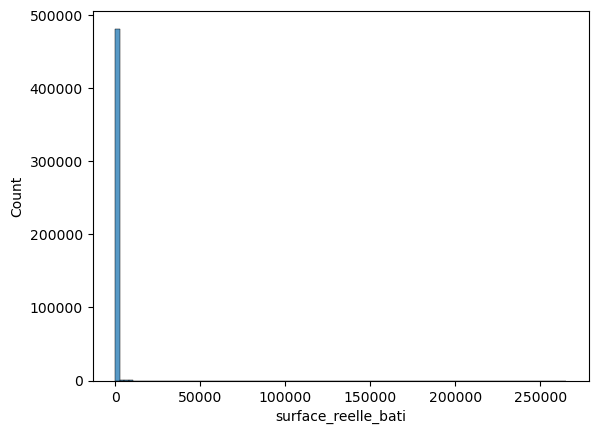

In [47]:
sns.histplot(valeurs_foncieres_clean['surface_reelle_bati'], bins=100)

La surface minimale légale pour louer un appartement est de 9m² si la hauteur sous plafond est d'au moins 2.20 mètres, sinon le volume habitable minimal doit être de 20m² par personne.


Comme je ne peux pas savoir les hauteurs sous plafond je vais limiter surface_reelle_bati à 9.

In [48]:
valeurs_foncieres_clean['surface_reelle_bati'].dtype

dtype('float64')

In [49]:
valeurs_foncieres_clean2 = valeurs_foncieres_clean[valeurs_foncieres_clean['surface_reelle_bati'] >= 9.0]

Calcul des outliers avec l'iqr.

In [50]:
Q1 = valeurs_foncieres_clean2['surface_reelle_bati'].quantile(0.25)
Q3 = valeurs_foncieres_clean2['surface_reelle_bati'].quantile(0.75)

iqr = Q3 - Q1

lower_limit = Q1 - iqr * 100
upper_limit = Q3 + iqr * 100             # Les données pour la limite supérieure semblent plausibles, d'où le multiplicateur élevé.


valeurs_foncieres_clean3 = valeurs_foncieres_clean2[
    (valeurs_foncieres_clean2['surface_reelle_bati'] >= lower_limit) & (valeurs_foncieres_clean2['surface_reelle_bati'] <= upper_limit)
]


valeurs_foncieres_clean3['surface_reelle_bati'].describe()

count    481154.000000
mean         98.699693
std         193.914289
min           9.000000
25%          48.000000
50%          74.000000
75%         103.000000
max        5603.000000
Name: surface_reelle_bati, dtype: float64

<Axes: xlabel='surface_reelle_bati', ylabel='Count'>

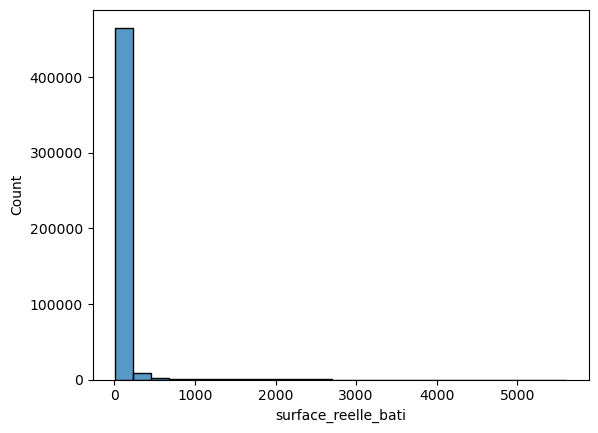

In [51]:
sns.histplot(valeurs_foncieres_clean3['surface_reelle_bati'], bins=25)

In [52]:
valeurs_foncieres_clean3[valeurs_foncieres_clean3['surface_reelle_bati'] > 600]

,id_mutation,date_mutation,numero_disposition,nature_mutation,valeur_fonciere,code_postal,code_commune,nom_commune,code_departement,id_parcelle,nombre_lots,code_type_local,type_local,surface_reelle_bati,nombre_pieces_principales,surface_terrain,longitude,latitude
1073,2024-318,2024-01-24,1,Vente,NaN,1110.0,1185,Plateau d'Hauteville,1,011850000B0688,0,4.0,Local industriel. commercial ou assimilé,1964.0,0.0,5800.0,5.597353,45.978628
1128,2024-337,2024-01-18,1,Vente,1250000.0,1090.0,1263,Montmerle-sur-Saône,1,01263000AB0799,0,4.0,Local industriel. commercial ou assimilé,1800.0,0.0,6972.0,4.762609,46.093584
1396,2024-411,2024-01-26,1,Vente en l'état futur d'achèvement,285000.0,1000.0,1344,Saint-Denis-lès-Bourg,1,01344000AD0123,0,4.0,Local industriel. commercial ou assimilé,1497.0,0.0,216.0,5.207168,46.211483
1413,2024-417,2024-01-12,1,Vente,540000.0,1100.0,1031,Bellignat,1,01031000AA0506,0,4.0,Local industriel. commercial ou assimilé,1244.0,0.0,4775.0,5.634567,46.243596
2666,2024-829,2024-02-07,1,Vente,210000.0,1640.0,1199,Jujurieux,1,011990000B2484,0,4.0,Local industriel. commercial ou assimilé,986.0,0.0,1896.0,5.401425,46.038562
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1563105,2024-554835,2024-06-04,1,Vente,5600000.0,75005.0,75105,Paris 5e Arrondissement,75,75105000AV0072,0,4.0,Local industriel. commercial ou assimilé,1107.0,0.0,207.0,2.349712,48.838133
1563873,2024-555218,2024-06-24,1,Vente,4500000.0,75016.0,75116,Paris 16e Arrondissement,75,75116000FD0002,3,4.0,Local industriel. commercial ou assimilé,669.0,0.0,NaN,2.285400,48.871680
1564252,2024-555374,2024-06-20,1,Vente,12000000.0,75014.0,75114,Paris 14e Arrondissement,75,75114000DS0006,1,4.0,Local industriel. commercial ou assimilé,697.0,0.0,NaN,2.321334,48.839291
1564521,2024-555510,2024-06-17,1,Vente,191000.0,75005.0,75105,Paris 5e Arrondissement,75,75105000BI0074,1,4.0,Local industriel. commercial ou assimilé,840.0,0.0,NaN,2.344576,48.844779


In [53]:
valeurs_foncieres_clean3[valeurs_foncieres_clean3['surface_reelle_bati'] > 600]['type_local'].unique()

array(['Local industriel. commercial ou assimilé', 'Maison',
       'Appartement'], dtype=object)

In [54]:
valeurs_foncieres_clean3[(valeurs_foncieres_clean3['surface_reelle_bati'] > 600) & (valeurs_foncieres_clean3['type_local'] == 'Appartement')].value_counts().reset_index()

,id_mutation,date_mutation,numero_disposition,nature_mutation,valeur_fonciere,code_postal,code_commune,nom_commune,code_departement,id_parcelle,nombre_lots,code_type_local,type_local,surface_reelle_bati,nombre_pieces_principales,surface_terrain,longitude,latitude,count
0,2024-542338,2024-04-15,1,Vente,32028750.0,75004.0,75104,Paris 4e Arrondissement,75,75104000AS0011,0,2.0,Appartement,1500.0,23.0,545.0,2.365133,48.849271,1


In [55]:
valeurs_foncieres_clean3[(valeurs_foncieres_clean3['surface_reelle_bati'] > 600) & (valeurs_foncieres_clean3['type_local'] == 'Maison')].value_counts().reset_index().sort_values(by='valeur_fonciere')

,id_mutation,date_mutation,numero_disposition,nature_mutation,valeur_fonciere,code_postal,code_commune,nom_commune,code_departement,id_parcelle,nombre_lots,code_type_local,type_local,surface_reelle_bati,nombre_pieces_principales,surface_terrain,longitude,latitude,count
30,2024-79274,2024-03-18,1,Vente,5000.0,16100.0,16330,Saint-Laurent-de-Cognac,16,16330000AB0268,0,1.0,Maison,857.0,15.0,7881.0,-0.419679,45.704182,1
63,2024-94839,2024-03-26,1,Vente,75500.0,19260.0,19172,Rilhac-Treignac,19,191720000C0514,0,1.0,Maison,770.0,3.0,460.0,1.685121,45.524197,1
33,2024-321588,2024-02-29,1,Vente,240000.0,59400.0,59122,Cambrai,59,59122000AS0689,0,1.0,Maison,605.0,12.0,926.0,3.229907,50.174095,1
32,2024-321588,2024-02-29,1,Vente,240000.0,59400.0,59122,Cambrai,59,59122000AS0689,0,1.0,Maison,605.0,12.0,990.0,3.229907,50.174095,1
28,2024-51380,2024-03-01,1,Vente,250000.0,12460.0,12116,Huparlac,12,12116000AB0006,0,1.0,Maison,800.0,23.0,3010.0,2.761790,44.712722,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27,2024-503945,2024-04-30,1,Vente en l'état futur d'achèvement,24632880.0,92200.0,92051,Neuilly-sur-Seine,92,920510000V0013,0,1.0,Maison,647.0,13.0,1050.0,2.276057,48.886671,1
57,2024-30005,2024-04-30,1,Vente,46500000.0,6400.0,6029,Cannes,6,06029000CL0052,0,1.0,Maison,1678.0,14.0,1185.0,7.043261,43.555116,1
58,2024-30005,2024-04-30,1,Vente,46500000.0,6400.0,6029,Cannes,6,06029000CL0052,0,1.0,Maison,1678.0,14.0,2645.0,7.043261,43.555116,1
59,2024-30005,2024-04-30,1,Vente,46500000.0,6400.0,6029,Cannes,6,06029000CL0052,0,1.0,Maison,1678.0,14.0,4345.0,7.043261,43.555116,1


##### Il n'y a pas plus de maison et d'appartement entre iqr\*30 et iqr\*100, les biens qui ont de très grandes surfaces baties sont des locaux commerciaux.

On pourrait tester de faire des calculs statistiques de valeurs aberrantes mais dans l'immobilier, il y a une trop grosse différence entre les petits appartements et les locaux commerciaux ou les chateaux en termes de surface réelle bati.

In [56]:
# Vérification du nombre de valeurs aberrantes 

from scipy.stats import zscore
valeurs_foncieres_clean3['z_score'] = zscore(valeurs_foncieres_clean3['surface_reelle_bati'])
anomalies = valeurs_foncieres_clean3[abs(valeurs_foncieres_clean3['z_score']) > 3]
print("Nombre d'anomalies:", len(anomalies))

Nombre d'anomalies: 4343


C:\Users\kelia\AppData\Local\Temp\ipykernel_10544\2684895025.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valeurs_foncieres_clean3['z_score'] = zscore(valeurs_foncieres_clean3['surface_reelle_bati'])


In [57]:
# Le kurtosis montre la "proéminence" des queues dans la distribution (un kurtosis > 3 montre qu'il y a beaucoup de valeurs extrêmes)

from scipy.stats import kurtosis
kurt = kurtosis(valeurs_foncieres_clean3['surface_reelle_bati'])
print("Kurtosis:", kurt)

Kurtosis: 279.753766409609


Il faut tout de même noter que en immobiliers il est très plausibles d'avoir des biens extraordinaires. Comme la grande majorité des biens ne sont pas hors normes, les biens exceptionnels pourraient être considérés comme outliers.

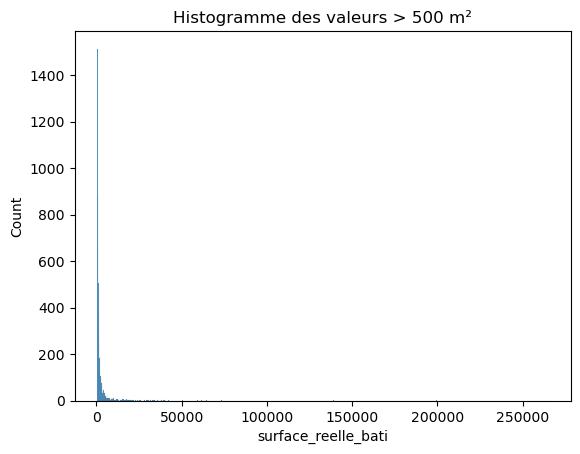

In [58]:
sns.histplot(data=valeurs_foncieres_clean[valeurs_foncieres_clean['surface_reelle_bati'] > 500], 
             x='surface_reelle_bati', 
             bins=1500)
plt.title("Histogramme des valeurs > 500 m²")
plt.show()

Bornes des bins : [   501.            677.33266667    853.66533333 ... 264647.33466667
 264823.66733333 265000.        ]
Intervalle du premier bin : 501.0 à 677.3326666666667
Valeurs dans le premier bin :
567        532.0
1477       600.0
2768       555.0
4218       560.0
4362       647.0
           ...  
1560574    604.0
1560576    600.0
1562484    559.0
1563873    669.0
1566559    600.0
Name: surface_reelle_bati, Length: 1510, dtype: float64


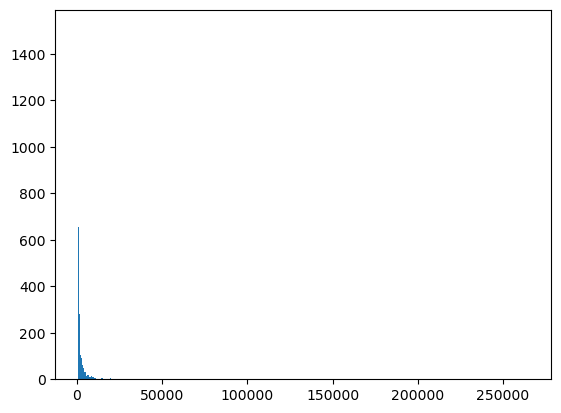

In [59]:
# Générer l'histogramme et récupérer les bins
counts, bin_edges, _ = plt.hist(valeurs_foncieres_clean[valeurs_foncieres_clean['surface_reelle_bati'] > 500]['surface_reelle_bati'], bins=1500)

# Afficher les bornes des bins
print("Bornes des bins :", bin_edges)

# Récupérer les bornes du premier intervalle
first_bin_min = bin_edges[0]
first_bin_max = bin_edges[1]
print(f"Intervalle du premier bin : {first_bin_min} à {first_bin_max}")

# Filtrer les valeurs appartenant au premier intervalle
first_bin_values = valeurs_foncieres_clean[
    (valeurs_foncieres_clean['surface_reelle_bati'] > first_bin_min) &
    (valeurs_foncieres_clean['surface_reelle_bati'] <= first_bin_max)
]

# Afficher les valeurs
print("Valeurs dans le premier bin :")
print(first_bin_values['surface_reelle_bati'])

valeurs_foncieres_clean3 semble être plutôt clean concernant les surfaces réelles bâties.

In [60]:
valeurs_foncieres_clean3.isna().sum()

id_mutation                       0
date_mutation                     0
numero_disposition                0
nature_mutation                   0
valeur_fonciere                2890
code_postal                      50
code_commune                      0
nom_commune                       0
code_departement                  0
id_parcelle                       0
nombre_lots                       0
code_type_local                   0
type_local                        0
surface_reelle_bati               0
nombre_pieces_principales         0
surface_terrain              186608
longitude                      4161
latitude                       4161
z_score                           0
dtype: int64

#### Faut-il remplacer les 2819 values dans valeur_fonciere? 

In [61]:
valeurs_foncieres_clean3.shape

(481154, 19)

Le nombre de valeurs manquantes semble négligeable par rapport au nombre de biens immobiliers dans notre dataframe mais il faut voir si une commune en particulier est touchée par un nombre de valeurs trop faible.

In [62]:
# Groupby sur 'code_departement' et compter les valeurs manquantes dans 'valeur_fonciere'
missing_values = valeurs_foncieres_clean3.groupby('code_departement')['valeur_fonciere'].apply(lambda x: x.isnull().sum())

# Afficher les résultats
print(missing_values)

code_departement
1        5
2       23
3        1
4        0
5        5
      ... 
974      1
29       1
2A       2
2B       2
30     686
Name: valeur_fonciere, Length: 99, dtype: int64


In [63]:
missing_values.sort_values(ascending=False).head(10)

code_departement
30    686
50    423
77    417
59    110
79     93
93     71
62     69
58     65
22     63
64     55
Name: valeur_fonciere, dtype: int64

In [64]:
print(f'Il y a {round(missing_values['30'] / valeurs_foncieres_clean3[valeurs_foncieres_clean3['code_departement'] == '30'].shape[0] * 100, 0)}% de valeurs manquantes dans notre département 30')

Il y a 16.0% de valeurs manquantes dans notre département 30


On pourrait éventuellement faire une analyse pour remplacer les 700 valeurs manquantes par la valeur moyenne des différents biens dans le 30 / ou une autre technique. Mais je vais simplement .dropna()

In [65]:
valeurs_foncieres_clean3

,id_mutation,date_mutation,numero_disposition,nature_mutation,valeur_fonciere,code_postal,code_commune,nom_commune,code_departement,id_parcelle,nombre_lots,code_type_local,type_local,surface_reelle_bati,nombre_pieces_principales,surface_terrain,longitude,latitude,z_score
6,2024-4,2024-01-03,1,Vente,329500.0,1170.0,1173,Gex,1,01173000AI0551,2,2.0,Appartement,89.0,4.0,NaN,6.058695,46.332212,-0.050021
78,2024-7,2024-01-03,1,Vente,94500.0,1150.0,1202,Lagnieu,1,01202000AC0198,0,2.0,Appartement,32.0,2.0,65.0,5.348768,45.904292,-0.343965
80,2024-7,2024-01-03,1,Vente,94500.0,1150.0,1202,Lagnieu,1,01202000AC0198,0,2.0,Appartement,74.0,3.0,65.0,5.348768,45.904292,-0.127374
81,2024-8,2024-01-03,1,Vente,220000.0,1640.0,1056,Boyeux-Saint-Jérôme,1,010560000C2523,0,1.0,Maison,40.0,1.0,488.0,5.461880,46.020243,-0.302710
82,2024-8,2024-01-03,1,Vente,220000.0,1640.0,1056,Boyeux-Saint-Jérôme,1,010560000C2524,0,1.0,Maison,80.0,2.0,858.0,5.461676,46.020164,-0.096433
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1566632,2024-556068,2024-05-23,1,Vente,335000.0,75016.0,75116,Paris 16e Arrondissement,75,75116000CL0048,1,2.0,Appartement,40.0,2.0,NaN,2.275384,48.853419,-0.302710
1566634,2024-556069,2024-06-04,1,Vente,384800.0,75011.0,75111,Paris 11e Arrondissement,75,75111000CR0087,3,2.0,Appartement,28.0,2.0,NaN,2.392573,48.851032,-0.364593
1566637,2024-556070,2024-06-25,1,Vente,230000.0,75014.0,75114,Paris 14e Arrondissement,75,75114000CI0130,2,2.0,Appartement,33.0,2.0,NaN,2.324494,48.828365,-0.338808
1566640,2024-556071,2024-04-09,1,Vente,833000.0,75015.0,75115,Paris 15e Arrondissement,75,75115000AJ0019,2,2.0,Appartement,100.0,4.0,NaN,2.302765,48.832709,0.006706


In [66]:
valeurs_foncieres_clean3 = valeurs_foncieres_clean3.dropna(subset='valeur_fonciere')

In [67]:
valeurs_foncieres_clean3.isna().sum()

id_mutation                       0
date_mutation                     0
numero_disposition                0
nature_mutation                   0
valeur_fonciere                   0
code_postal                      50
code_commune                      0
nom_commune                       0
code_departement                  0
id_parcelle                       0
nombre_lots                       0
code_type_local                   0
type_local                        0
surface_reelle_bati               0
nombre_pieces_principales         0
surface_terrain              186406
longitude                      4105
latitude                       4105
z_score                           0
dtype: int64

In [68]:
valeurs_foncieres_clean3 = valeurs_foncieres_clean3.drop('surface_terrain', axis=1)
valeurs_foncieres_clean3.isna().sum()

id_mutation                     0
date_mutation                   0
numero_disposition              0
nature_mutation                 0
valeur_fonciere                 0
code_postal                    50
code_commune                    0
nom_commune                     0
code_departement                0
id_parcelle                     0
nombre_lots                     0
code_type_local                 0
type_local                      0
surface_reelle_bati             0
nombre_pieces_principales       0
longitude                    4105
latitude                     4105
z_score                         0
dtype: int64

In [69]:
valeurs_foncieres_clean3 = valeurs_foncieres_clean3.reset_index()
valeurs_foncieres_clean3

,index,id_mutation,date_mutation,numero_disposition,nature_mutation,valeur_fonciere,code_postal,code_commune,nom_commune,code_departement,id_parcelle,nombre_lots,code_type_local,type_local,surface_reelle_bati,nombre_pieces_principales,longitude,latitude,z_score
0,6,2024-4,2024-01-03,1,Vente,329500.0,1170.0,1173,Gex,1,01173000AI0551,2,2.0,Appartement,89.0,4.0,6.058695,46.332212,-0.050021
1,78,2024-7,2024-01-03,1,Vente,94500.0,1150.0,1202,Lagnieu,1,01202000AC0198,0,2.0,Appartement,32.0,2.0,5.348768,45.904292,-0.343965
2,80,2024-7,2024-01-03,1,Vente,94500.0,1150.0,1202,Lagnieu,1,01202000AC0198,0,2.0,Appartement,74.0,3.0,5.348768,45.904292,-0.127374
3,81,2024-8,2024-01-03,1,Vente,220000.0,1640.0,1056,Boyeux-Saint-Jérôme,1,010560000C2523,0,1.0,Maison,40.0,1.0,5.461880,46.020243,-0.302710
4,82,2024-8,2024-01-03,1,Vente,220000.0,1640.0,1056,Boyeux-Saint-Jérôme,1,010560000C2524,0,1.0,Maison,80.0,2.0,5.461676,46.020164,-0.096433
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
478259,1566632,2024-556068,2024-05-23,1,Vente,335000.0,75016.0,75116,Paris 16e Arrondissement,75,75116000CL0048,1,2.0,Appartement,40.0,2.0,2.275384,48.853419,-0.302710
478260,1566634,2024-556069,2024-06-04,1,Vente,384800.0,75011.0,75111,Paris 11e Arrondissement,75,75111000CR0087,3,2.0,Appartement,28.0,2.0,2.392573,48.851032,-0.364593
478261,1566637,2024-556070,2024-06-25,1,Vente,230000.0,75014.0,75114,Paris 14e Arrondissement,75,75114000CI0130,2,2.0,Appartement,33.0,2.0,2.324494,48.828365,-0.338808
478262,1566640,2024-556071,2024-04-09,1,Vente,833000.0,75015.0,75115,Paris 15e Arrondissement,75,75115000AJ0019,2,2.0,Appartement,100.0,4.0,2.302765,48.832709,0.006706


Pour essayer de ne pas perdre les 3800 valeurs manquantes dans les longitudes et latitudes, on peut essayer d'utiliser le df des villes de france pour remplacer ces valeurs. Les valeurs ne vont pas représenter l'emplacement précis des biens immobiliers mais l'emplacement des communes, ce qui est plus intéressant puisque nous n'allions pas utiliser l'emplacement précis des biens.

In [70]:
valeurs_foncieres_clean3['code_commune'].dtype

dtype('O')

In [71]:
valeurs_foncieres_clean3['code_commune'] = valeurs_foncieres_clean3['code_commune'].astype(str).str.strip()
valeurs_foncieres_clean3['code_commune']

0          1173
1          1202
2          1202
3          1056
4          1056
          ...  
478259    75116
478260    75111
478261    75114
478262    75115
478263    75111
Name: code_commune, Length: 478264, dtype: object

In [72]:
valeurs_foncieres_clean4 = valeurs_foncieres_clean3.merge(ville_france_clean, left_on='code_commune', right_on='insee_code')
valeurs_foncieres_clean4

,index,id_mutation,date_mutation,numero_disposition,nature_mutation,valeur_fonciere,code_postal,code_commune,nom_commune,code_departement,...,latitude_x,z_score,insee_code,city_code,label,latitude_y,longitude_y,department_name,department_number,region_geojson_name
0,124288,2024-41314,2024-01-08,1,Vente,39000.0,10110.0,10034,Bar-sur-Seine,10,...,48.127501,-0.251141,10034,bar sur seine,bar sur seine,48.113354,4.378933,aube,10,Grand Est
1,124290,2024-41316,2024-01-05,1,Vente,72500.0,10000.0,10387,Troyes,10,...,48.286843,-0.359436,10387,troyes,troyes,48.296734,4.078437,aube,10,Grand Est
2,124292,2024-41318,2024-01-05,1,Vente,72500.0,10000.0,10387,Troyes,10,...,48.286843,-0.374907,10387,troyes,troyes,48.296734,4.078437,aube,10,Grand Est
3,124296,2024-41320,2024-01-04,1,Vente,250000.0,10120.0,10333,Saint-André-les-Vergers,10,...,NaN,0.011863,10333,st andre les vergers,st andre les vergers,48.277950,4.048697,aube,10,Grand Est
4,124298,2024-41320,2024-01-04,1,Vente,250000.0,10120.0,10333,Saint-André-les-Vergers,10,...,NaN,0.011863,10333,st andre les vergers,st andre les vergers,48.277950,4.048697,aube,10,Grand Est
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
742260,1566632,2024-556068,2024-05-23,1,Vente,335000.0,75016.0,75116,Paris 16e Arrondissement,75,...,48.853419,-0.302710,75116,paris 16,paris,48.860373,2.261968,paris,75,Île-de-France
742261,1566634,2024-556069,2024-06-04,1,Vente,384800.0,75011.0,75111,Paris 11e Arrondissement,75,...,48.851032,-0.364593,75111,paris 11,paris,48.859055,2.380025,paris,75,Île-de-France
742262,1566637,2024-556070,2024-06-25,1,Vente,230000.0,75014.0,75114,Paris 14e Arrondissement,75,...,48.828365,-0.338808,75114,paris 14,paris,48.829262,2.326537,paris,75,Île-de-France
742263,1566640,2024-556071,2024-04-09,1,Vente,833000.0,75015.0,75115,Paris 15e Arrondissement,75,...,48.832709,0.006706,75115,paris 15,paris,48.840072,2.292837,paris,75,Île-de-France


In [73]:
valeurs_foncieres_clean4.isna().sum()

index                           0
id_mutation                     0
date_mutation                   0
numero_disposition              0
nature_mutation                 0
valeur_fonciere                 0
code_postal                   104
code_commune                    0
nom_commune                     0
code_departement                0
id_parcelle                     0
nombre_lots                     0
code_type_local                 0
type_local                      0
surface_reelle_bati             0
nombre_pieces_principales       0
longitude_x                  5507
latitude_x                   5507
z_score                         0
insee_code                      0
city_code                       0
label                           0
latitude_y                      0
longitude_y                     0
department_name                 0
department_number               0
region_geojson_name             0
dtype: int64

In [74]:
loyer_app_clean_ville

,insee_c,loypredm2,lwr_ip_m2,upr_ip_m2,libgeo,department_name,department_number,region_geojson_name,latitude,longitude
0,64394,8.555667,7.054856,10.375752,Monpezat,pyrénées-atlantiques,64,Nouvelle-Aquitaine,43.501145,-0.063727
1,32450,8.555667,7.054856,10.375752,Tourdun,gers,32,Occitanie,43.547137,0.158533
2,64369,8.555667,7.054856,10.375752,Maspie-Lalonquère-Juillacq,pyrénées-atlantiques,64,Nouvelle-Aquitaine,43.425222,-0.147790
3,64552,8.555667,7.054856,10.375752,Vialer,pyrénées-atlantiques,64,Nouvelle-Aquitaine,43.508658,-0.178923
4,65174,8.555667,7.054856,10.375752,Estirac,hautes-pyrénées,65,Occitanie,43.499218,0.029271
...,...,...,...,...,...,...,...,...,...,...
33967,97360,12.284981,9.431030,16.002575,Apatou,guyane,973,Guyane,4.830256,-54.269343
33968,97361,12.284981,9.431030,16.002575,Awala-Yalimapo,guyane,973,Guyane,5.684288,-53.917368
33969,97306,12.284981,9.431030,16.002575,Mana,guyane,973,Guyane,4.991233,-53.645464
33970,97306,12.284981,9.431030,16.002575,Mana,guyane,973,Guyane,4.991233,-53.645464


In [75]:
valeurs_foncieres_clean4 = valeurs_foncieres_clean4.drop(['z_score', 'label', 'city_code', 'code_commune', 'code_departement'], axis=1)
valeurs_foncieres_clean4

,index,id_mutation,date_mutation,numero_disposition,nature_mutation,valeur_fonciere,code_postal,nom_commune,id_parcelle,nombre_lots,...,surface_reelle_bati,nombre_pieces_principales,longitude_x,latitude_x,insee_code,latitude_y,longitude_y,department_name,department_number,region_geojson_name
0,124288,2024-41314,2024-01-08,1,Vente,39000.0,10110.0,Bar-sur-Seine,100340000A0053,0,...,50.0,3.0,4.375673,48.127501,10034,48.113354,4.378933,aube,10,Grand Est
1,124290,2024-41316,2024-01-05,1,Vente,72500.0,10000.0,Troyes,10387000CK0411,1,...,29.0,2.0,4.076639,48.286843,10387,48.296734,4.078437,aube,10,Grand Est
2,124292,2024-41318,2024-01-05,1,Vente,72500.0,10000.0,Troyes,10387000CK0411,1,...,26.0,0.0,4.076639,48.286843,10387,48.296734,4.078437,aube,10,Grand Est
3,124296,2024-41320,2024-01-04,1,Vente,250000.0,10120.0,Saint-André-les-Vergers,10333000AL0720,0,...,101.0,3.0,NaN,NaN,10333,48.277950,4.048697,aube,10,Grand Est
4,124298,2024-41320,2024-01-04,1,Vente,250000.0,10120.0,Saint-André-les-Vergers,10333000AL0720,0,...,101.0,3.0,NaN,NaN,10333,48.277950,4.048697,aube,10,Grand Est
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
742260,1566632,2024-556068,2024-05-23,1,Vente,335000.0,75016.0,Paris 16e Arrondissement,75116000CL0048,1,...,40.0,2.0,2.275384,48.853419,75116,48.860373,2.261968,paris,75,Île-de-France
742261,1566634,2024-556069,2024-06-04,1,Vente,384800.0,75011.0,Paris 11e Arrondissement,75111000CR0087,3,...,28.0,2.0,2.392573,48.851032,75111,48.859055,2.380025,paris,75,Île-de-France
742262,1566637,2024-556070,2024-06-25,1,Vente,230000.0,75014.0,Paris 14e Arrondissement,75114000CI0130,2,...,33.0,2.0,2.324494,48.828365,75114,48.829262,2.326537,paris,75,Île-de-France
742263,1566640,2024-556071,2024-04-09,1,Vente,833000.0,75015.0,Paris 15e Arrondissement,75115000AJ0019,2,...,100.0,4.0,2.302765,48.832709,75115,48.840072,2.292837,paris,75,Île-de-France


#### On peut maintenant vérifier les outliers de valeurs_foncieres_clean4['valeur_fonciere']

<Axes: xlabel='valeur_fonciere', ylabel='Count'>

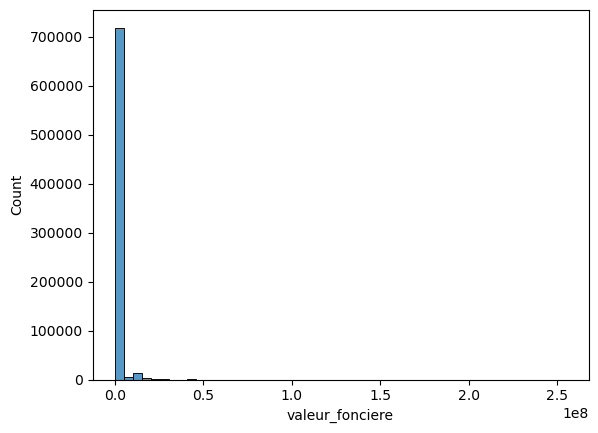

In [76]:
sns.histplot(valeurs_foncieres_clean4['valeur_fonciere'], bins=50)

<Axes: ylabel='valeur_fonciere'>

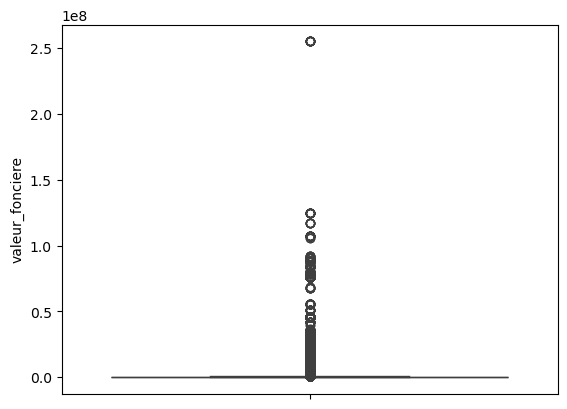

In [77]:
sns.boxplot(valeurs_foncieres_clean4['valeur_fonciere'])

In [78]:
valeurs_foncieres_clean4['valeur_fonciere'].describe()

count    7.422650e+05
mean     7.274412e+05
std      3.260393e+06
min      1.000000e+00
25%      1.150000e+05
50%      1.912000e+05
75%      3.336500e+05
max      2.550000e+08
Name: valeur_fonciere, dtype: float64

In [79]:
valeurs_foncieres_clean4['valeur_fonciere'].sort_values(ascending=True).head(20000).describe()

count    20000.000000
mean     13253.278567
std       9578.007375
min          1.000000
25%       3500.000000
50%      14320.000000
75%      22000.000000
max      29000.000000
Name: valeur_fonciere, dtype: float64

D'après mes recherches, le prix minimum au m² pour un appartement en France serait de ~ 900€, pour faire une estimation sans trop passer de temps sur la recherche de prix des maisons je vais retirer 100€ sur le m².

Ce qui fait un minimum pour le prix au m² de 900€ pour un appartement et de 800€ pour une maison.

Sachant que le minimum légal en terme de surface habitable pour les appartements avec hauteur sous plafond de 2m20 est de 9m². Ca ferait un appartement à 8100€, ce qui est très peu probable. Je vais donc crop les données à 15000€ pour être sur de ne pas avoir d'outliers.

Pour les maisons, la surface minimale pour une construction neuve est de 30m². Ce qui fait 24000€, ce qui paraît possible.

Sources : https://fr.wikipedia.org/wiki/Taille_des_logements_en_France#:~:text=La%20surface%20minimale%20pour%20une,de%20la%20taille%20des%20logements.

In [80]:
valeurs_foncieres_clean4['type_local'].unique()

array(['Maison', 'Appartement',
       'Local industriel. commercial ou assimilé'], dtype=object)

In [81]:
valeurs_foncieres_clean4['type_local'].dtype

dtype('O')

In [82]:
valeurs_foncieres_clean4['type_local'] = valeurs_foncieres_clean4['type_local'].astype(str).str.strip()

In [83]:
valeurs_foncieres_clean4_maison = valeurs_foncieres_clean4[valeurs_foncieres_clean4['type_local'] == 'Maison' ]

In [84]:
valeurs_foncieres_clean4_maison

,index,id_mutation,date_mutation,numero_disposition,nature_mutation,valeur_fonciere,code_postal,nom_commune,id_parcelle,nombre_lots,...,surface_reelle_bati,nombre_pieces_principales,longitude_x,latitude_x,insee_code,latitude_y,longitude_y,department_name,department_number,region_geojson_name
0,124288,2024-41314,2024-01-08,1,Vente,39000.0,10110.0,Bar-sur-Seine,100340000A0053,0,...,50.0,3.0,4.375673,48.127501,10034,48.113354,4.378933,aube,10,Grand Est
3,124296,2024-41320,2024-01-04,1,Vente,250000.0,10120.0,Saint-André-les-Vergers,10333000AL0720,0,...,101.0,3.0,NaN,NaN,10333,48.277950,4.048697,aube,10,Grand Est
4,124298,2024-41320,2024-01-04,1,Vente,250000.0,10120.0,Saint-André-les-Vergers,10333000AL0720,0,...,101.0,3.0,NaN,NaN,10333,48.277950,4.048697,aube,10,Grand Est
5,124299,2024-41321,2024-01-05,1,Vente,138500.0,10100.0,Gélannes,10164000AC0086,0,...,105.0,4.0,3.674780,48.484375,10164,48.476294,3.667108,aube,10,Grand Est
6,124302,2024-41323,2024-01-09,1,Vente,12500.0,10250.0,Plaines-Saint-Lange,10288000AB0203,0,...,60.0,3.0,4.483097,47.995423,10288,47.996935,4.473179,aube,10,Grand Est
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
739702,1562013,2024-554315,2024-05-22,1,Vente,1111500.0,75014.0,Paris 14e Arrondissement,75114000CX0059,0,...,140.0,4.0,2.315382,48.827330,75114,48.829262,2.326537,paris,75,Île-de-France
740497,1563464,2024-555001,2024-06-13,1,Vente,2001000.0,75014.0,Paris 14e Arrondissement,75114000BL0068,0,...,165.0,6.0,2.333963,48.823672,75114,48.829262,2.326537,paris,75,Île-de-France
740521,1563507,2024-555020,2024-05-31,1,Vente,1500000.0,75013.0,Paris 13e Arrondissement,75113000EE0052,0,...,55.0,2.0,2.348126,48.827235,75113,48.828425,2.362254,paris,75,Île-de-France
740716,1563854,2024-555210,2024-06-17,1,Vente,1150000.0,75014.0,Paris 14e Arrondissement,75114000CR0113,0,...,127.0,3.0,2.320968,48.830438,75114,48.829262,2.326537,paris,75,Île-de-France


In [85]:
valeurs_foncieres_clean4_maison = valeurs_foncieres_clean4_maison[valeurs_foncieres_clean4_maison['valeur_fonciere'] >= 24000]
valeurs_foncieres_clean4_maison['valeur_fonciere'].describe()

count    3.299550e+05
mean     2.941099e+05
std      6.666286e+05
min      2.400000e+04
25%      1.270000e+05
50%      2.000000e+05
75%      3.165000e+05
max      8.550000e+07
Name: valeur_fonciere, dtype: float64

In [86]:
valeurs_foncieres_clean4_appartement = valeurs_foncieres_clean4[valeurs_foncieres_clean4['type_local'] == 'Appartement' ]

In [87]:
valeurs_foncieres_clean4_appartement

,index,id_mutation,date_mutation,numero_disposition,nature_mutation,valeur_fonciere,code_postal,nom_commune,id_parcelle,nombre_lots,...,surface_reelle_bati,nombre_pieces_principales,longitude_x,latitude_x,insee_code,latitude_y,longitude_y,department_name,department_number,region_geojson_name
1,124290,2024-41316,2024-01-05,1,Vente,72500.0,10000.0,Troyes,10387000CK0411,1,...,29.0,2.0,4.076639,48.286843,10387,48.296734,4.078437,aube,10,Grand Est
7,124308,2024-41324,2024-01-05,1,Vente,249100.0,10000.0,Troyes,10387000BS0052,2,...,115.0,4.0,4.066954,48.301481,10387,48.296734,4.078437,aube,10,Grand Est
9,124326,2024-41331,2024-01-12,1,Vente,179000.0,10000.0,Troyes,10387000BW0278,3,...,99.0,5.0,4.069840,48.297235,10387,48.296734,4.078437,aube,10,Grand Est
10,124329,2024-41332,2024-01-08,1,Vente,55000.0,10000.0,Troyes,10387000BN0783,1,...,46.0,2.0,4.069584,48.305913,10387,48.296734,4.078437,aube,10,Grand Est
16,124354,2024-41343,2024-01-09,1,Vente,138250.0,10000.0,Troyes,10387000AY0239,2,...,78.0,4.0,4.082967,48.302316,10387,48.296734,4.078437,aube,10,Grand Est
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
742260,1566632,2024-556068,2024-05-23,1,Vente,335000.0,75016.0,Paris 16e Arrondissement,75116000CL0048,1,...,40.0,2.0,2.275384,48.853419,75116,48.860373,2.261968,paris,75,Île-de-France
742261,1566634,2024-556069,2024-06-04,1,Vente,384800.0,75011.0,Paris 11e Arrondissement,75111000CR0087,3,...,28.0,2.0,2.392573,48.851032,75111,48.859055,2.380025,paris,75,Île-de-France
742262,1566637,2024-556070,2024-06-25,1,Vente,230000.0,75014.0,Paris 14e Arrondissement,75114000CI0130,2,...,33.0,2.0,2.324494,48.828365,75114,48.829262,2.326537,paris,75,Île-de-France
742263,1566640,2024-556071,2024-04-09,1,Vente,833000.0,75015.0,Paris 15e Arrondissement,75115000AJ0019,2,...,100.0,4.0,2.302765,48.832709,75115,48.840072,2.292837,paris,75,Île-de-France


In [88]:
valeurs_foncieres_clean4_appartement = valeurs_foncieres_clean4_appartement[valeurs_foncieres_clean4_appartement['valeur_fonciere'] >= 15000]
valeurs_foncieres_clean4_appartement['valeur_fonciere'].describe()

count    3.345450e+05
mean     1.085702e+06
std      3.787346e+06
min      1.500000e+04
25%      1.121000e+05
50%      1.825000e+05
75%      3.360000e+05
max      2.550000e+08
Name: valeur_fonciere, dtype: float64

##### Maintenant, il faut s'occuper des outliers supérieurs, ce qui n'est pas forcément nécessaire puisque l'on peut utiliser la médiane au lieu de la moyenne (les outliers supérieurs faussent la moyenne).

In [89]:
Q1 = valeurs_foncieres_clean4_maison['valeur_fonciere'].quantile(0.25)
Q3 = valeurs_foncieres_clean4_maison['valeur_fonciere'].quantile(0.75)

iqr = Q3 - Q1

lower_limit = Q1 - iqr * 20
upper_limit = Q3 + iqr * 20

valeurs_foncieres_clean5_maison = valeurs_foncieres_clean4_maison[
    (valeurs_foncieres_clean4_maison['valeur_fonciere'] >= lower_limit) & (valeurs_foncieres_clean4_maison['valeur_fonciere'] <= upper_limit)
]

valeurs_foncieres_clean5_maison.describe()

,index,numero_disposition,valeur_fonciere,code_postal,nombre_lots,code_type_local,surface_reelle_bati,nombre_pieces_principales,longitude_x,latitude_x,latitude_y,longitude_y
count,3.291000e+05,329100.000000,3.291000e+05,329024.000000,329100.000000,329100.0,329100.000000,329100.000000,326242.000000,326242.000000,329100.000000,329100.000000
mean,8.017607e+05,1.031711,2.726236e+05,51725.649509,0.042410,1.0,100.784610,4.160006,2.486145,45.319708,45.270408,2.521319
std,3.982980e+05,0.266544,2.892630e+05,24845.181653,0.269841,0.0,45.574156,1.504567,9.419229,10.728178,10.863983,9.529154
min,1.242880e+05,1.000000,2.400000e+04,1590.000000,0.000000,1.0,9.000000,0.000000,-61.803587,-21.384116,-21.339621,-61.779711
25%,4.546960e+05,1.000000,1.265000e+05,31140.000000,0.000000,1.0,73.000000,3.000000,-0.614252,45.106463,45.093758,-0.602565
50%,7.948030e+05,1.000000,2.000000e+05,50120.000000,0.000000,1.0,93.000000,4.000000,1.393268,47.331092,47.331427,1.404100
75%,1.150473e+06,1.000000,3.150000e+05,74250.000000,0.000000,1.0,120.000000,5.000000,3.326370,48.797575,48.797668,3.341015
max,1.563854e+06,30.000000,4.093000e+06,97490.000000,24.000000,1.0,1200.000000,64.000000,55.825269,51.079494,51.072906,55.754535


In [90]:
valeurs_foncieres_clean5_maison[valeurs_foncieres_clean5_maison['valeur_fonciere'] == valeurs_foncieres_clean5_maison['valeur_fonciere'].max()]

,index,id_mutation,date_mutation,numero_disposition,nature_mutation,valeur_fonciere,code_postal,nom_commune,id_parcelle,nombre_lots,...,surface_reelle_bati,nombre_pieces_principales,longitude_x,latitude_x,insee_code,latitude_y,longitude_y,department_name,department_number,region_geojson_name
296003,713738,2024-248206,2024-06-24,1,Vente,4093000.0,44240.0,Sucé-sur-Erdre,44201000ZX0169,0,...,882.0,6.0,-1.532823,47.325352,44201,47.353568,-1.519418,loire-atlantique,44,Pays de la Loire
296004,713739,2024-248206,2024-06-24,1,Vente,4093000.0,44240.0,Sucé-sur-Erdre,44201000ZX0169,0,...,882.0,6.0,-1.532823,47.325352,44201,47.353568,-1.519418,loire-atlantique,44,Pays de la Loire


In [91]:
Q1 = valeurs_foncieres_clean4_appartement['valeur_fonciere'].quantile(0.25)
Q3 = valeurs_foncieres_clean4_appartement['valeur_fonciere'].quantile(0.75)

iqr = Q3 - Q1

lower_limit = Q1 - iqr * 10
upper_limit = Q3 + iqr * 10             # ajusté en regardant la ligne d'en dessous

valeurs_foncieres_clean5_appartement = valeurs_foncieres_clean4_appartement[
    (valeurs_foncieres_clean4_appartement['valeur_fonciere'] >= lower_limit) & (valeurs_foncieres_clean4_appartement['valeur_fonciere'] <= upper_limit)
]

valeurs_foncieres_clean5_appartement.describe()

,index,numero_disposition,valeur_fonciere,code_postal,nombre_lots,code_type_local,surface_reelle_bati,nombre_pieces_principales,longitude_x,latitude_x,latitude_y,longitude_y
count,3.082820e+05,308282.000000,3.082820e+05,308257.000000,308282.000000,308282.0,308282.000000,308282.000000,306919.000000,306919.000000,308282.000000,308282.000000
mean,8.876666e+05,1.045848,2.497894e+05,55936.937562,1.237640,2.0,55.355898,2.524747,4.095248,44.083966,44.078340,4.099174
std,4.364028e+05,0.668620,2.757591e+05,26144.673490,0.848926,0.0,27.614044,1.176028,10.377916,12.086141,12.111722,10.395721
min,1.242900e+05,1.000000,1.500000e+04,1590.000000,0.000000,2.0,9.000000,0.000000,-61.768736,-21.380864,-21.339621,-61.754210
25%,4.978890e+05,1.000000,1.075000e+05,33240.000000,1.000000,2.0,35.000000,2.000000,1.271125,43.601316,43.596038,1.248830
50%,9.029180e+05,1.000000,1.700000e+05,59110.000000,1.000000,2.0,52.000000,2.000000,2.500108,45.895330,45.901643,2.503357
75%,1.295686e+06,1.000000,2.790000e+05,77185.000000,2.000000,2.0,70.000000,3.000000,5.166996,48.775070,48.774023,5.159319
max,1.566641e+06,26.000000,2.575000e+06,97490.000000,16.000000,2.0,858.000000,70.000000,55.769812,51.082069,51.072906,55.745039


In [92]:
valeurs_foncieres_clean5_appartement[valeurs_foncieres_clean5_appartement['valeur_fonciere']==valeurs_foncieres_clean5_appartement['valeur_fonciere'].max()]

,index,id_mutation,date_mutation,numero_disposition,nature_mutation,valeur_fonciere,code_postal,nom_commune,id_parcelle,nombre_lots,...,surface_reelle_bati,nombre_pieces_principales,longitude_x,latitude_x,insee_code,latitude_y,longitude_y,department_name,department_number,region_geojson_name
300529,721679,2024-251240,2024-03-15,1,Vente,2575000.0,44500.0,La Baule-Escoublac,44055000CH0351,2,...,110.0,4.0,-2.417495,47.277997,44055,47.290929,-2.353215,loire-atlantique,44,Pays de la Loire


In [93]:
valeurs_foncieres_clean[(valeurs_foncieres_clean['valeur_fonciere']==valeurs_foncieres_clean['valeur_fonciere'].max()) & (valeurs_foncieres_clean['type_local']=='Appartement')]

,id_mutation,date_mutation,numero_disposition,nature_mutation,valeur_fonciere,code_postal,code_commune,nom_commune,code_departement,id_parcelle,nombre_lots,code_type_local,type_local,surface_reelle_bati,nombre_pieces_principales,surface_terrain,longitude,latitude
1545464,2024-546375,2024-06-27,1,Vente,255000000.0,75008.0,75108,Paris 8e Arrondissement,75,75108000AM0007,0,2.0,Appartement,16.0,2.0,871.0,2.307565,48.867236


In [94]:
valeurs_foncieres_clean[valeurs_foncieres_clean['type_local']=='Appartement'].sort_values(by='valeur_fonciere', ascending=False).head(10)

,id_mutation,date_mutation,numero_disposition,nature_mutation,valeur_fonciere,code_postal,code_commune,nom_commune,code_departement,id_parcelle,nombre_lots,code_type_local,type_local,surface_reelle_bati,nombre_pieces_principales,surface_terrain,longitude,latitude
1545464,2024-546375,2024-06-27,1,Vente,255000000.0,75008.0,75108,Paris 8e Arrondissement,75,75108000AM0007,0,2.0,Appartement,16.0,2.0,871.0,2.307565,48.867236
1203512,2024-422201,2024-02-15,1,Vente,92100000.0,77290.0,77294,Mitry-Mory,77,77294000BK0136,0,2.0,Appartement,105.0,5.0,78081.0,2.643328,48.986778
1203513,2024-422201,2024-02-15,1,Vente,92100000.0,77290.0,77294,Mitry-Mory,77,77294000BK0136,0,2.0,Appartement,45.0,2.0,78081.0,2.643328,48.986778
1536600,2024-541608,2024-04-02,1,Vente en l'état futur d'achèvement,90590400.0,75008.0,75108,Paris 8e Arrondissement,75,75108000BN0019,0,2.0,Appartement,85.0,2.0,1235.0,2.320090,48.870547
1536599,2024-541608,2024-04-02,1,Vente en l'état futur d'achèvement,90590400.0,75008.0,75108,Paris 8e Arrondissement,75,75108000BN0019,0,2.0,Appartement,137.0,4.0,1235.0,2.320090,48.870547
1536596,2024-541608,2024-04-02,1,Vente en l'état futur d'achèvement,90590400.0,75008.0,75108,Paris 8e Arrondissement,75,75108000BN0019,0,2.0,Appartement,219.0,5.0,1235.0,2.320090,48.870547
1536595,2024-541608,2024-04-02,1,Vente en l'état futur d'achèvement,90590400.0,75008.0,75108,Paris 8e Arrondissement,75,75108000BN0019,0,2.0,Appartement,22.0,2.0,1235.0,2.320090,48.870547
1536594,2024-541608,2024-04-02,1,Vente en l'état futur d'achèvement,90590400.0,75008.0,75108,Paris 8e Arrondissement,75,75108000BN0019,0,2.0,Appartement,39.0,2.0,1235.0,2.320090,48.870547
1430175,2024-501374,2024-01-26,1,Vente,88150000.0,92200.0,92051,Neuilly-sur-Seine,92,920510000R0053,0,2.0,Appartement,230.0,6.0,1991.0,2.275428,48.890357
1430092,2024-501374,2024-01-26,1,Vente,88150000.0,92200.0,92051,Neuilly-sur-Seine,92,920510000R0053,0,2.0,Appartement,135.0,4.0,1278.0,2.275428,48.890357


### Peut-être faire la valeur médiane et la valeur moyenne pour chaque département pour détecter les valeurs aberrantes.

In [95]:
valeurs_foncieres_clean4_maison.columns

Index(['index', 'id_mutation', 'date_mutation', 'numero_disposition',
       'nature_mutation', 'valeur_fonciere', 'code_postal', 'nom_commune',
       'id_parcelle', 'nombre_lots', 'code_type_local', 'type_local',
       'surface_reelle_bati', 'nombre_pieces_principales', 'longitude_x',
       'latitude_x', 'insee_code', 'latitude_y', 'longitude_y',
       'department_name', 'department_number', 'region_geojson_name'],
      dtype='object')

In [96]:
valeurs_foncieres_clean4_maison.groupby(by='department_number').describe()

index                                                    \
                    count          mean          std        min         25%   
department_number                                                             
03                    4.0  6.347688e+05  2368.373193   632759.0   632926.25   
10                 1388.0  1.288237e+05  2680.352700   124288.0   126385.25   
11                 4196.0  1.403802e+05  4216.991799   133352.0   136841.25   
12                 1733.0  1.545091e+05  3703.983769   147997.0   151143.00   
13                 8440.0  1.819602e+05  8979.949573   161187.0   177224.00   
...                   ...           ...          ...        ...         ...   
95                 2741.0  1.505000e+06  5136.435204  1496652.0  1500449.00   
971                 507.0  1.514774e+06   672.022462  1513596.0  1514185.50   
972                 529.0  1.517171e+06   693.332286  1515985.0  1516533.00   
973                 355.0  1.519329e+06   425.335556  1518443.0  1519056.00   
974                7916.0  1.524117e+06  2696.718623  1520066.0  1522039.75   

                                                    numero_disposition  \
                         50%         75%        max              count   
department_number                                                        
03                  634278.0   636120.50   637760.0                4.0   
10                  129068.5   131032.75   133348.0             1388.0   
11                  140157.0   144164.25   147995.0             4196.0   
12                  154528.0   157670.00   161160.0             1733.0   
13                  183019.0   189481.25   194731.0             8440.0   
...                      ...         ...        ...                ...   
95                 1504475.0  1509616.00  1513589.0             2741.0   
971                1514806.0  1515340.50  1515951.0              507.0   
972                1517287.0  1517722.00  1518415.0              529.0   
973                1519317.0  1519716.50  1520062.0              355.0   
974                1523580.0  1525725.00  1530092.0             7916.0   

                             ... latitude_y            longitude_y             \
                       mean  ...        75%        max       count       mean   
department_number            ...                                                
03                 1.250000  ...  46.357083  46.391448         4.0   5.755071   
10                 1.034582  ...  48.415368  48.674732      1388.0   4.063999   
11                 1.020734  ...  43.209416  43.426897      4196.0   2.559238   
12                 1.034045  ...  44.513288  44.895123      1733.0   2.548511   
13                 1.042180  ...  43.546935  43.900188      8440.0   5.188977   
...                     ...  ...        ...        ...         ...        ...   
95                 1.026997  ...  49.067942  49.213260      2741.0   2.215925   
971                1.088757  ...  16.272955  16.465347       507.0 -61.538923   
972                1.015123  ...  14.675215  14.855434       529.0 -61.011456   
973                1.008451  ...   4.933531   5.269990       355.0 -52.454656   
974                1.058615  ... -20.946752 -20.933029      7916.0  55.457136   

                                                                         \
                        std        min        25%        50%        75%   
department_number                                                         
03                 0.170522   5.641736   5.674000   5.684755   5.765826   
10                 0.285853   3.408258   3.887686   4.073560   4.194403   
11                 0.365116   1.723106   2.343422   2.343422   2.994910   
12                 0.348604   1.871702   2.256332   2.559642   2.822550   
13                 0.325160   4.464417   4.950589   5.315757   5.433848   
...                     ...        ...        ...        ...        ...   
95                 0.163688   1.634202   2.101619   2.228345   2.3

In [97]:
# Calcul des statistiques par département
stats = valeurs_foncieres_clean4_maison.groupby('department_number')['valeur_fonciere'].agg(['mean', 'median'])

# Ajout d'une colonne pour l'écart absolu
stats['diff_mean_median'] = (stats['mean'] - stats['median']).abs()

# Optionnel : Écart relatif pour mieux comparer les variations
stats['rel_diff'] = stats['diff_mean_median'] / stats['mean']

# Afficher les départements avec des différences significatives
significant_outliers = stats[stats['rel_diff'] > 0.2]  # Par exemple, seuil de 20%

In [98]:
print(significant_outliers)

                           mean     median  diff_mean_median  rel_diff
department_number                                                     
11                 2.124834e+05   161500.0      5.098341e+04  0.239941
13                 6.376131e+05   398400.0      2.392131e+05  0.375170
14                 2.158122e+05   169700.0      4.611223e+04  0.213668
23                 1.119269e+05    83500.0      2.842693e+04  0.253978
24                 2.240985e+05   165000.0      5.909847e+04  0.263717
26                 3.075961e+05   245000.0      6.259610e+04  0.203501
2A                 7.477988e+05   504150.0      2.436488e+05  0.325821
33                 5.877085e+05   342650.0      2.450585e+05  0.416973
34                 4.380872e+05   284000.0      1.540872e+05  0.351727
35                 3.151624e+05   250000.0      6.516242e+04  0.206758
36                 1.328716e+05    95000.0      3.787157e+04  0.285024
40                 3.522570e+05   245000.0      1.072570e+05  0.304485
45    

### Calcul d'outliers en utilisant un dbscan

In [99]:
def dbscan_outlier_detection(group, eps=0.5, min_samples=5):
    # Vérifie si la colonne 'valeur_fonciere' contient suffisamment de données
    if len(group) < min_samples:
        group['outlier'] = 0  # Pas assez de points pour DBSCAN
        return group
    
    # Appliquer DBSCAN
    X = group[['valeur_fonciere']].to_numpy()
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    group['outlier'] = dbscan.fit_predict(X)
    return group


In [100]:
valeurs_foncieres_clean5_maison = valeurs_foncieres_clean4_maison.groupby('department_number').apply(
    dbscan_outlier_detection, eps=1, min_samples=5
)

C:\Users\kelia\AppData\Local\Temp\ipykernel_10544\1828097738.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  valeurs_foncieres_clean5_maison = valeurs_foncieres_clean4_maison.groupby('department_number').apply(


In [101]:
valeurs_foncieres_clean5_maison = valeurs_foncieres_clean5_maison[valeurs_foncieres_clean5_maison['outlier'] != -1]
valeurs_foncieres_clean5_maison.describe()


,index,numero_disposition,valeur_fonciere,code_postal,nombre_lots,code_type_local,surface_reelle_bati,nombre_pieces_principales,longitude_x,latitude_x,latitude_y,longitude_y,outlier
count,2.259920e+05,225992.000000,2.259920e+05,225922.000000,225992.000000,225992.0,225992.000000,225992.000000,223939.000000,223939.000000,225992.000000,225992.000000,225992.000000
mean,7.997852e+05,1.038413,2.705798e+05,51593.871659,0.038156,1.0,97.559312,4.080715,2.741606,45.059286,44.994671,2.794425,104.349490
std,3.970773e+05,0.463048,6.781166e+05,24763.875722,0.261163,0.0,43.540647,1.490288,10.153227,12.175340,12.336910,10.276206,106.148128
min,1.242960e+05,1.000000,2.400000e+04,1590.000000,0.000000,1.0,9.000000,0.000000,-61.801289,-21.383633,-21.339621,-61.779711,0.000000
25%,4.550210e+05,1.000000,1.200000e+05,31110.000000,0.000000,1.0,71.000000,3.000000,-0.797947,45.558820,45.549956,-0.794886,30.000000
50%,7.932040e+05,1.000000,1.850000e+05,50000.000000,0.000000,1.0,90.000000,4.000000,0.907096,47.480564,47.476657,0.898064,69.000000
75%,1.142802e+06,1.000000,2.850000e+05,74140.000000,0.000000,1.0,116.000000,5.000000,3.073031,48.865889,48.866851,3.059747,142.000000
max,1.530092e+06,30.000000,8.550000e+07,97490.000000,24.000000,1.0,1200.000000,64.000000,55.825269,51.079494,51.072906,55.754535,685.000000


In [102]:
valeurs_foncieres_clean5_maison[valeurs_foncieres_clean5_maison['valeur_fonciere'] == valeurs_foncieres_clean5_maison['valeur_fonciere'].max()]

index  id_mutation date_mutation  \
department_number                                              
83                584287  1300760  2024-455321    2024-06-30   
                  584288  1300763  2024-455321    2024-06-30   
                  584289  1300764  2024-455321    2024-06-30   
                  584290  1300765  2024-455321    2024-06-30   
                  584291  1300770  2024-455321    2024-06-30   
                  584292  1300771  2024-455321    2024-06-30   

                          numero_disposition nature_mutation  valeur_fonciere  \
department_number                                                               
83                584287                   1           Vente       85500000.0   
                  584288                   1           Vente       85500000.0   
                  584289                   1           Vente       85500000.0   
                  584290                   1           Vente       85500000.0   
                  584291                   1           Vente       85500000.0   
                  584292                   1           Vente       85500000.0   

                          code_postal nom_commune     id_parcelle  \
department_number                                                   
83                584287      83350.0  Ramatuelle  83101000AD0103   
                  584288      83350.0  Ramatuelle  83101000AD0103   
                  584289      83350.0  Ramatuelle  83101000AD0103   
                  584290      83350.0  Ramatuelle  83101000AD0103   
                  584291      83350.0  Ramatuelle  83101000AD0105   
                  584292      83350.0  Ramatuelle  83101000AD0105   

                          nombre_lots  ...  nombre_pieces_principales  \
department_number                      ...                              
83                584287            0  ...                        3.0   
                  584288            0  ...                       12.0   
                  584289            0  ...                        3.0   
                  584290            0  ...                       12.0   
                  584291            0  ...                        9.0   
                  584292            0  ...                        9.0   

                         longitude_x  latitude_x  insee_code  latitude_y  \
department_number                                                          
83                584287    6.669873   43.246624       83101    43.21866   
                  584288    6.669873   43.246624       83101    43.21866   
                  584289    6.669873   43.246624       83101    43.21866   
                  584290    6.669873   43.246624       83101    43.21866   
                  584291    6.669029   43.246474       83101    43.21866   
                  584292    6.669029   43.246474       83101    43.21866   

                          longitude_y department_name  department_number  \
department_number                                                          
83                584287     6.637287             var                 83   
                  584288     6.637287             var                 83   
                  584289     6.637287             var                 83   
                  584290     6.637287             var                 83   
                  584291     6.637287             var                 83   
                  584292     6.637287             var                 83   

                                 region_geojson_name outlier  
department_number                                             
83                584287  Provence-Alpes-Côte d'Azur     298  
                  584288  Provence-Alpes-Côte d'Azur     298  
                  584289  Provence-Alpes-Côte d'Azur     298  
                  584290  Provence-Alpes-Côte d'Azur     298  
                  584291  Provence-Alpes-Côte d'Azur     298  
                  584292  Provence-Alpes-Côte d'Azur     298  

[6 ro

### Pour les outliers supérieurs, il faut faire le calcul pour chaque département ou commune.

In [103]:
valeurs_foncieres_clean5_maison['department_number'].nunique()

88

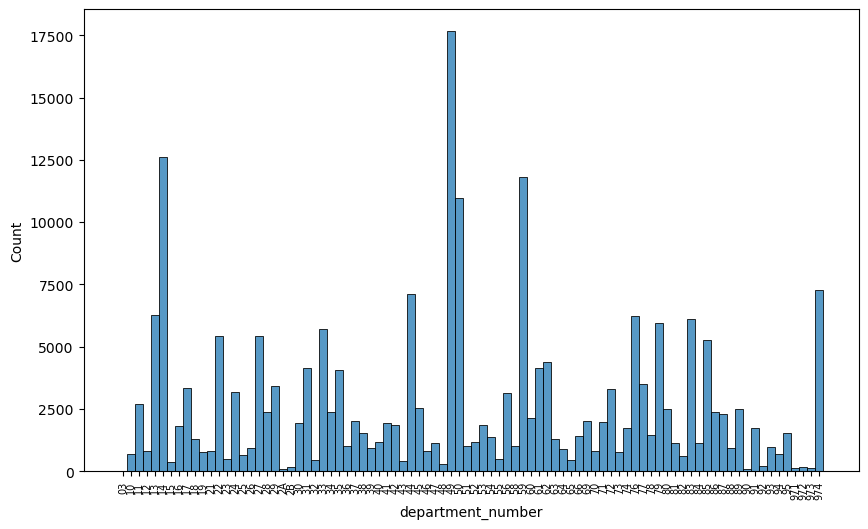

In [104]:
plt.figure(figsize=(10,6))
sns.histplot(valeurs_foncieres_clean5_maison['department_number'], bins=valeurs_foncieres_clean5_maison['department_number'].nunique())
plt.xticks(rotation=90, fontsize=7)
plt.show()

On peut voir dans le tableau juste au dessus que l'id de parcelle est représentée plusieurs fois mais jamais avec les mêmes caractéristiques (par exemple pour le nombre de pièces principales). Donc on drop les duplicates.

In [105]:
valeurs_foncieres_clean5_maison['id_parcelle'].duplicated().sum()

126774

In [106]:
valeurs_foncieres_clean6_maison = valeurs_foncieres_clean5_maison.drop_duplicates(subset='id_parcelle')
valeurs_foncieres_clean6_maison.shape

(99218, 23)

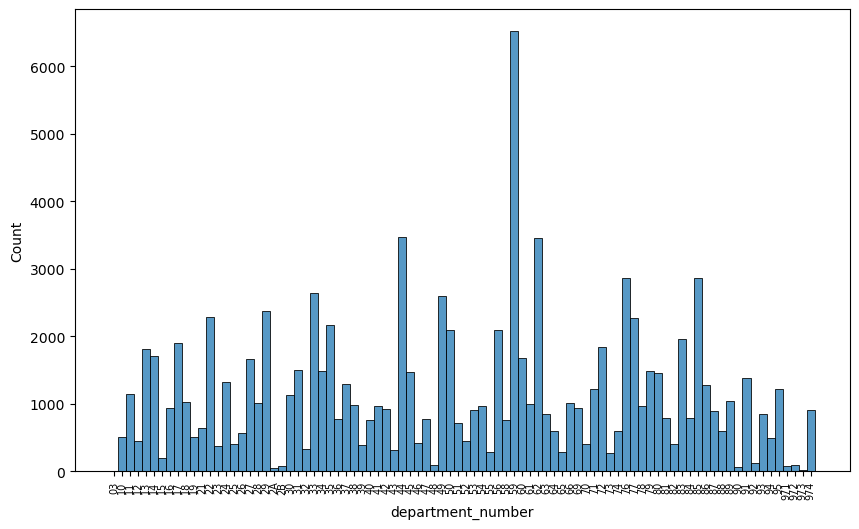

In [107]:
plt.figure(figsize=(10,6))
sns.histplot(valeurs_foncieres_clean6_maison['department_number'], bins=valeurs_foncieres_clean6_maison['department_number'].nunique())
plt.xticks(rotation=90, fontsize=7)
plt.show()

In [108]:
# Compter les occurrences par 'department_number'
counts = valeurs_foncieres_clean6_maison['department_number'].value_counts()

# Trier les counts par ordre croissant
low_counts = counts.sort_values(ascending=True)

# Afficher les départements avec les counts les moins élevés
print(low_counts.head())

department_number
03      4
973    18
2A     49
90     56
971    77
Name: count, dtype: int64


In [109]:
valeurs_foncieres_clean5_appartement = valeurs_foncieres_clean4_appartement.groupby('department_number').apply(
    dbscan_outlier_detection, eps=1, min_samples=5
)

C:\Users\kelia\AppData\Local\Temp\ipykernel_10544\2967895961.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  valeurs_foncieres_clean5_appartement = valeurs_foncieres_clean4_appartement.groupby('department_number').apply(


In [110]:
valeurs_foncieres_clean5_appartement = valeurs_foncieres_clean5_appartement[valeurs_foncieres_clean5_appartement['outlier'] != -1]
valeurs_foncieres_clean5_appartement.describe()

,index,numero_disposition,valeur_fonciere,code_postal,nombre_lots,code_type_local,surface_reelle_bati,nombre_pieces_principales,longitude_x,latitude_x,latitude_y,longitude_y,outlier
count,2.528490e+05,252849.000000,2.528490e+05,252844.000000,252849.000000,252849.0,252849.000000,252849.000000,251655.000000,251655.000000,252849.000000,252849.000000,252849.000000
mean,9.253152e+05,1.194903,1.343060e+06,58482.813616,1.067590,2.0,54.444578,2.514085,7.264901,40.155285,40.166058,7.259036,196.595292
std,4.514742e+05,1.772135,4.268548e+06,27331.960329,0.883336,0.0,26.516547,1.165754,15.576853,19.407236,19.401617,15.577903,218.768650
min,1.243290e+05,1.000000,1.500000e+04,1590.000000,0.000000,2.0,9.000000,0.000000,-61.724075,-21.384828,-21.339621,-61.728473,0.000000
25%,4.989150e+05,1.000000,1.150000e+05,33300.000000,0.000000,2.0,35.000000,2.000000,1.422845,43.531000,43.536112,1.432095,44.000000
50%,9.196780e+05,1.000000,1.850000e+05,59800.000000,1.000000,2.0,53.000000,2.000000,2.659111,45.729883,45.733367,2.662628,118.000000
75%,1.330062e+06,1.000000,3.550000e+05,83400.000000,2.000000,2.0,70.000000,3.000000,5.450953,48.699880,48.691855,5.433848,276.000000
max,1.566641e+06,32.000000,9.059040e+07,97490.000000,16.000000,2.0,858.000000,33.000000,55.769812,51.081797,51.072906,55.745039,1417.000000


In [111]:
valeurs_foncieres_clean5_appartement[valeurs_foncieres_clean5_appartement['valeur_fonciere'] == valeurs_foncieres_clean5_appartement['valeur_fonciere'].max()]

index  id_mutation date_mutation  \
department_number                                              
75                725991  1536594  2024-541608    2024-04-02   
                  725992  1536595  2024-541608    2024-04-02   
                  725993  1536596  2024-541608    2024-04-02   
                  725995  1536599  2024-541608    2024-04-02   
                  725996  1536600  2024-541608    2024-04-02   

                          numero_disposition  \
department_number                              
75                725991                   1   
                  725992                   1   
                  725993                   1   
                  725995                   1   
                  725996                   1   

                                             nature_mutation  valeur_fonciere  \
department_number                                                               
75                725991  Vente en l'état futur d'achèvement       90590400.0   
                  725992  Vente en l'état futur d'achèvement       90590400.0   
                  725993  Vente en l'état futur d'achèvement       90590400.0   
                  725995  Vente en l'état futur d'achèvement       90590400.0   
                  725996  Vente en l'état futur d'achèvement       90590400.0   

                          code_postal              nom_commune  \
department_number                                                
75                725991      75008.0  Paris 8e Arrondissement   
                  725992      75008.0  Paris 8e Arrondissement   
                  725993      75008.0  Paris 8e Arrondissement   
                  725995      75008.0  Paris 8e Arrondissement   
                  725996      75008.0  Paris 8e Arrondissement   

                             id_parcelle  nombre_lots  ...  \
department_number                                      ...   
75                725991  75108000BN0019            0  ...   
                  725992  75108000BN0019            0  ...   
                  725993  75108000BN0019            0  ...   
                  725995  75108000BN0019            0  ...   
                  725996  75108000BN0019            0  ...   

                          nombre_pieces_principales longitude_x  latitude_x  \
department_number                                                             
75                725991                        2.0     2.32009   48.870547   
                  725992                        2.0     2.32009   48.870547   
                  725993                        5.0     2.32009   48.870547   
                  725995                        4.0     2.32009   48.870547   
                  725996                        2.0     2.32009   48.870547   

                          insee_code  latitude_y  longitude_y department_name  \
department_number                                                               
75                725991       75108   48.872725     2.312558           paris   
                  725992       75108   48.872725     2.312558           paris   
                  725993       75108   48.872725     2.312558           paris   
                  725995       75108   48.872725     2.312558           paris   
                  725996       75108   48.872725     2.312558           paris   

                          department_number  region_geojson_name outlier  
department_number                                                         
75                725991                 75        Île-de-France     422  
                  725992                 75        Île-de-France     422  
                  725993                 75        Île-de-France     422  
                  725995                 75        Île-de-France     422  
                  725996                 75        Île-de-France     422  

[5 rows x 23 columns]

Comme précédemment, on peut voir dans le tableau juste au dessus que l'id de parcelle est représentée plusieurs fois mais jamais avec les mêmes caractéristiques (par exemple pour le nombre de pièces principales).

In [112]:
valeurs_foncieres_clean6_appartement = valeurs_foncieres_clean5_appartement.drop_duplicates(subset='id_parcelle')
valeurs_foncieres_clean6_appartement.shape

(64997, 23)

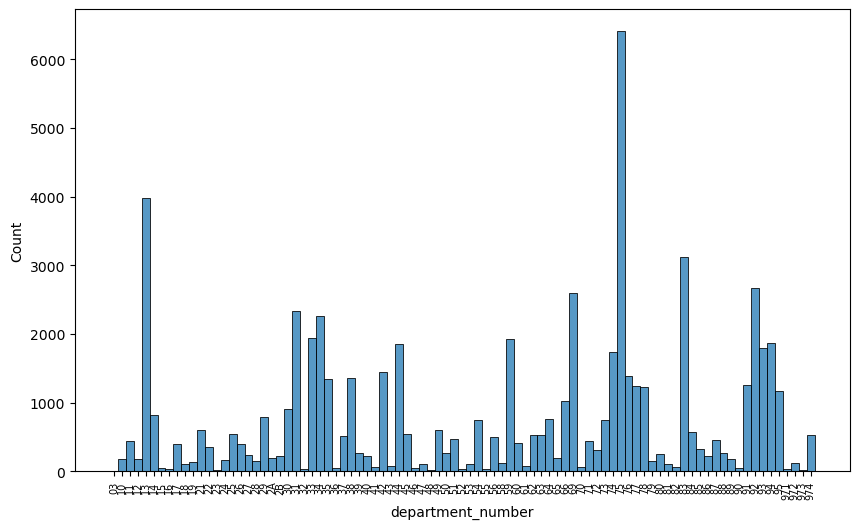

In [113]:
plt.figure(figsize=(10,6))
sns.histplot(valeurs_foncieres_clean6_appartement['department_number'], bins=valeurs_foncieres_clean6_appartement['department_number'].nunique())
plt.xticks(rotation=90, fontsize=7)
plt.show()

In [114]:
# Compter les occurrences par 'department_number'
counts = valeurs_foncieres_clean6_appartement['department_number'].value_counts()

# Trier les counts par ordre croissant
low_counts = counts.sort_values(ascending=True)

# Afficher les départements avec les counts les moins élevés
print(low_counts.head())

department_number
03      1
973    13
48     16
23     23
32     28
Name: count, dtype: int64


### On peut maintenant sauvegarder ces 2 tables pour les envoyer dans bigquery !

In [115]:
valeurs_foncieres_clean6_maison.dtypes

index                          int64
id_mutation                   object
date_mutation                 object
numero_disposition             int64
nature_mutation               object
valeur_fonciere              float64
code_postal                  float64
nom_commune                   object
id_parcelle                   object
nombre_lots                    int64
code_type_local              float64
type_local                    object
surface_reelle_bati          float64
nombre_pieces_principales    float64
longitude_x                  float64
latitude_x                   float64
insee_code                    object
latitude_y                   float64
longitude_y                  float64
department_name               object
department_number             object
region_geojson_name           object
outlier                        int64
dtype: object

In [116]:
# valeurs_foncieres_clean6_appartement.to_csv('C:/Users/kelia/valeurs_foncieres_clean6_appartement.csv', index=False)
# valeurs_foncieres_clean6_maison.to_csv('C:/Users/kelia/valeurs_foncieres_clean6_maison.csv', index=False)

In [117]:
valeurs_foncieres_clean6_appartement

index  id_mutation date_mutation  \
department_number                                              
03                256878   632984  2024-221210    2024-02-23   
10                10       124329   2024-41332    2024-01-08   
                  25       124383   2024-41356    2024-01-11   
                  27       124393   2024-41361    2024-01-16   
                  46       124452   2024-41388    2024-01-09   
...                           ...          ...           ...   
974               722296  1529984  2024-538115    2024-06-26   
                  722439  1530034  2024-538147    2024-06-28   
                  722446  1530038  2024-538148    2024-06-27   
                  722486  1530052  2024-538156    2024-06-28   
                  722536  1530068  2024-538165    2024-06-27   

                          numero_disposition nature_mutation  valeur_fonciere  \
department_number                                                               
03                256878                   1           Vente         176400.0   
10                10                       1           Vente          55000.0   
                  25                       1           Vente          85000.0   
                  27                       1           Vente          50000.0   
                  46                       1           Vente          95000.0   
...                                      ...             ...              ...   
974               722296                   1           Vente         100000.0   
                  722439                   1           Vente         177000.0   
                  722446                   1           Vente         305000.0   
                  722486                   1           Vente         207430.0   
                  722536                   1           Vente         290000.0   

                          code_postal              nom_commune  \
department_number                                                
03                256878       1590.0                  Chancia   
10                10          10000.0                   Troyes   
                  25          10120.0  Saint-André-les-Vergers   
                  27          10000.0                   Troyes   
                  46          10800.0  Saint-Julien-les-Villas   
...                               ...                      ...   
974               722296      97490.0              Saint-Denis   
                  722439      97432.0             Saint-Pierre   
                  722446      97480.0             Saint-Joseph   
                  722486      97434.0               Saint-Paul   
                  722536      97434.0               Saint-Paul   

                             id_parcelle  nombre_lots  ...  \
department_number                                      ...   
03                256878  39102000AK0419            2  ...   
10                10      10387000BN0783            1  ...   
                  25      10333000AK0591            2  ...   
                  27      10387000BL0844            2  ...   
                  46      10343000AP0309            1  ...   
...                                  ...          ...  ...   
974               722296  97411000HT0053            1  ...   
                  722439  97416000HP0420            1  ...   
                  722446  97412000BR0761            0  ...   
                  722486  97415000HM0042            1  ...   
                  722536  97415000CZ1210            1  ...   

                          nombre_pieces_principales longitude_x  latitude_x  \
department_number                                                             
03                256878                        3.0    5.643308   46.347374   
10                10                            2.0    4.069584   48.305913   
                  25                            4.0    4.066347   48.288526   
                  27                            1.0    4.054154   48.304053   
 

In [118]:
valeurs_foncieres_clean6_maison


index  id_mutation date_mutation  \
department_number                                              
03                256761   632759  2024-221122    2024-02-16   
                  256877   632982  2024-221209    2024-02-23   
                  257945   635574  2024-222077    2024-04-19   
                  259042   637760  2024-222787    2024-06-11   
10                3        124296   2024-41320    2024-01-04   
...                           ...          ...           ...   
974               722574  1530077  2024-538170    2024-06-19   
                  722580  1530078  2024-538171    2024-06-27   
                  722606  1530080  2024-538173    2024-06-28   
                  722629  1530086  2024-538177    2024-05-22   
                  722635  1530092  2024-538181    2024-05-28   

                          numero_disposition nature_mutation  valeur_fonciere  \
department_number                                                               
03                256761                   2           Vente        198000.00   
                  256877                   1           Vente        303040.00   
                  257945                   1           Vente        305500.00   
                  259042                   1           Vente        140000.00   
10                3                        1           Vente        250000.00   
...                                      ...             ...              ...   
974               722574                   1           Vente        275000.00   
                  722580                   2           Vente        490000.00   
                  722606                   2           Vente        550000.00   
                  722629                   1           Vente         61333.32   
                  722635                   1           Vente        388000.00   

                          code_postal              nom_commune  \
department_number                                                
03                256761       1590.0          Lavancia-Epercy   
                  256877       1590.0                  Chancia   
                  257945      39310.0                   Lajoux   
                  259042       1590.0          Lavancia-Epercy   
10                3           10120.0  Saint-André-les-Vergers   
...                               ...                      ...   
974               722574      97430.0                Le Tampon   
                  722580      97490.0              Saint-Denis   
                  722606      97410.0             Saint-Pierre   
                  722629      97430.0                Le Tampon   
                  722635      97430.0                Le Tampon   

                             id_parcelle  nombre_lots  ...  \
department_number                                      ...   
03                256761  392830000D0992            0  ...   
                  256877  39102000AK0482            0  ...   
                  257945  39274000AC0061            0  ...   
                  259042  39283000ZA0300            0  ...   
10                3       10333000AL0720            0  ...   
...                                  ...          ...  ...   
974               722574  97422000BP1578            0  ...   
                  722580  97411000HI0607            0  ...   
                  722606  97416000ES2217            0  ...   
                  722629  97422000CM0101            0  ...   
                  722635  97422000EH0153            0  ...   

                          nombre_pieces_principales longitude_x  latitude_x  \
department_number                                                             
03                256761                        4.0    5.678731   46.334146   
                  256877                        5.0    5.642961   46.348291   
                  257945                        5.0    5.975336   46.374189   
                  259042                        4.0    5.681542   46.328100   
1

In [119]:
valeurs_foncieres_clean6_maison['prix_m2'] = valeurs_foncieres_clean6_maison['valeur_fonciere'] / valeurs_foncieres_clean6_maison['surface_reelle_bati']
valeurs_foncieres_clean6_maison

C:\Users\kelia\AppData\Local\Temp\ipykernel_10544\328772839.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valeurs_foncieres_clean6_maison['prix_m2'] = valeurs_foncieres_clean6_maison['valeur_fonciere'] / valeurs_foncieres_clean6_maison['surface_reelle_bati']


index  id_mutation date_mutation  \
department_number                                              
03                256761   632759  2024-221122    2024-02-16   
                  256877   632982  2024-221209    2024-02-23   
                  257945   635574  2024-222077    2024-04-19   
                  259042   637760  2024-222787    2024-06-11   
10                3        124296   2024-41320    2024-01-04   
...                           ...          ...           ...   
974               722574  1530077  2024-538170    2024-06-19   
                  722580  1530078  2024-538171    2024-06-27   
                  722606  1530080  2024-538173    2024-06-28   
                  722629  1530086  2024-538177    2024-05-22   
                  722635  1530092  2024-538181    2024-05-28   

                          numero_disposition nature_mutation  valeur_fonciere  \
department_number                                                               
03                256761                   2           Vente        198000.00   
                  256877                   1           Vente        303040.00   
                  257945                   1           Vente        305500.00   
                  259042                   1           Vente        140000.00   
10                3                        1           Vente        250000.00   
...                                      ...             ...              ...   
974               722574                   1           Vente        275000.00   
                  722580                   2           Vente        490000.00   
                  722606                   2           Vente        550000.00   
                  722629                   1           Vente         61333.32   
                  722635                   1           Vente        388000.00   

                          code_postal              nom_commune  \
department_number                                                
03                256761       1590.0          Lavancia-Epercy   
                  256877       1590.0                  Chancia   
                  257945      39310.0                   Lajoux   
                  259042       1590.0          Lavancia-Epercy   
10                3           10120.0  Saint-André-les-Vergers   
...                               ...                      ...   
974               722574      97430.0                Le Tampon   
                  722580      97490.0              Saint-Denis   
                  722606      97410.0             Saint-Pierre   
                  722629      97430.0                Le Tampon   
                  722635      97430.0                Le Tampon   

                             id_parcelle  nombre_lots  ...  longitude_x  \
department_number                                      ...                
03                256761  392830000D0992            0  ...     5.678731   
                  256877  39102000AK0482            0  ...     5.642961   
                  257945  39274000AC0061            0  ...     5.975336   
                  259042  39283000ZA0300            0  ...     5.681542   
10                3       10333000AL0720            0  ...          NaN   
...                                  ...          ...  ...          ...   
974               722574  97422000BP1578            0  ...    55.497827   
                  722580  97411000HI0607            0  ...          NaN   
                  722606  97416000ES2217            0  ...          NaN   
                  722629  97422000CM0101            0  ...    55.532451   
                  722635  97422000EH0153            0  ...    55.516318   

                         latitude_x  insee_code  latitude_y  longitude_y  \
department_number                                                          
03                256761  46.334146       39283   46.336506     5.684755   
                  256877  46.348291       39102   46.345629     5.641736   
  

In [120]:
valeurs_foncieres_clean6_appartement['prix_m2'] = valeurs_foncieres_clean6_appartement['valeur_fonciere'] / valeurs_foncieres_clean6_appartement['surface_reelle_bati']
valeurs_foncieres_clean6_appartement

C:\Users\kelia\AppData\Local\Temp\ipykernel_10544\2398612404.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valeurs_foncieres_clean6_appartement['prix_m2'] = valeurs_foncieres_clean6_appartement['valeur_fonciere'] / valeurs_foncieres_clean6_appartement['surface_reelle_bati']


index  id_mutation date_mutation  \
department_number                                              
03                256878   632984  2024-221210    2024-02-23   
10                10       124329   2024-41332    2024-01-08   
                  25       124383   2024-41356    2024-01-11   
                  27       124393   2024-41361    2024-01-16   
                  46       124452   2024-41388    2024-01-09   
...                           ...          ...           ...   
974               722296  1529984  2024-538115    2024-06-26   
                  722439  1530034  2024-538147    2024-06-28   
                  722446  1530038  2024-538148    2024-06-27   
                  722486  1530052  2024-538156    2024-06-28   
                  722536  1530068  2024-538165    2024-06-27   

                          numero_disposition nature_mutation  valeur_fonciere  \
department_number                                                               
03                256878                   1           Vente         176400.0   
10                10                       1           Vente          55000.0   
                  25                       1           Vente          85000.0   
                  27                       1           Vente          50000.0   
                  46                       1           Vente          95000.0   
...                                      ...             ...              ...   
974               722296                   1           Vente         100000.0   
                  722439                   1           Vente         177000.0   
                  722446                   1           Vente         305000.0   
                  722486                   1           Vente         207430.0   
                  722536                   1           Vente         290000.0   

                          code_postal              nom_commune  \
department_number                                                
03                256878       1590.0                  Chancia   
10                10          10000.0                   Troyes   
                  25          10120.0  Saint-André-les-Vergers   
                  27          10000.0                   Troyes   
                  46          10800.0  Saint-Julien-les-Villas   
...                               ...                      ...   
974               722296      97490.0              Saint-Denis   
                  722439      97432.0             Saint-Pierre   
                  722446      97480.0             Saint-Joseph   
                  722486      97434.0               Saint-Paul   
                  722536      97434.0               Saint-Paul   

                             id_parcelle  nombre_lots  ...  longitude_x  \
department_number                                      ...                
03                256878  39102000AK0419            2  ...     5.643308   
10                10      10387000BN0783            1  ...     4.069584   
                  25      10333000AK0591            2  ...     4.066347   
                  27      10387000BL0844            2  ...     4.054154   
                  46      10343000AP0309            1  ...     4.094964   
...                                  ...          ...  ...          ...   
974               722296  97411000HT0053            1  ...    55.489939   
                  722439  97416000HP0420            1  ...    55.476753   
                  722446  97412000BR0761            0  ...    55.618437   
                  722486  97415000HM0042            1  ...    55.231090   
                  722536  97415000CZ1210            1  ...    55.224009   

                         latitude_x  insee_code  latitude_y  longitude_y  \
department_number                                                          
03                256878  46.347374       39102   46.345629     5.641736   
10                10      48.305913       10387   48.296734     4.078437   
  

In [121]:
# valeurs_foncieres_clean6_appartement.to_csv('C:/Users/kelia/valeurs_foncieres_clean6_appartement.csv', index=False)
# valeurs_foncieres_clean6_maison.to_csv('C:/Users/kelia/valeurs_foncieres_clean6_maison.csv', index=False)

### En faisant le looker studio, il s'est avérer qu'il n'y a pas assez de valeurs dans les df6 donc je ne vais pas utiliser les df4 avec les outliers supérieurs et simplement utiliser la médiane pour la visualisation.

In [122]:
valeurs_foncieres_clean4_appartement['prix_m2'] = valeurs_foncieres_clean4_appartement['valeur_fonciere'] / valeurs_foncieres_clean4_appartement['surface_reelle_bati']
valeurs_foncieres_clean4_appartement

C:\Users\kelia\AppData\Local\Temp\ipykernel_10544\1784086365.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valeurs_foncieres_clean4_appartement['prix_m2'] = valeurs_foncieres_clean4_appartement['valeur_fonciere'] / valeurs_foncieres_clean4_appartement['surface_reelle_bati']


,index,id_mutation,date_mutation,numero_disposition,nature_mutation,valeur_fonciere,code_postal,nom_commune,id_parcelle,nombre_lots,...,nombre_pieces_principales,longitude_x,latitude_x,insee_code,latitude_y,longitude_y,department_name,department_number,region_geojson_name,prix_m2
1,124290,2024-41316,2024-01-05,1,Vente,72500.0,10000.0,Troyes,10387000CK0411,1,...,2.0,4.076639,48.286843,10387,48.296734,4.078437,aube,10,Grand Est,2500.000000
7,124308,2024-41324,2024-01-05,1,Vente,249100.0,10000.0,Troyes,10387000BS0052,2,...,4.0,4.066954,48.301481,10387,48.296734,4.078437,aube,10,Grand Est,2166.086957
9,124326,2024-41331,2024-01-12,1,Vente,179000.0,10000.0,Troyes,10387000BW0278,3,...,5.0,4.069840,48.297235,10387,48.296734,4.078437,aube,10,Grand Est,1808.080808
10,124329,2024-41332,2024-01-08,1,Vente,55000.0,10000.0,Troyes,10387000BN0783,1,...,2.0,4.069584,48.305913,10387,48.296734,4.078437,aube,10,Grand Est,1195.652174
16,124354,2024-41343,2024-01-09,1,Vente,138250.0,10000.0,Troyes,10387000AY0239,2,...,4.0,4.082967,48.302316,10387,48.296734,4.078437,aube,10,Grand Est,1772.435897
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
742260,1566632,2024-556068,2024-05-23,1,Vente,335000.0,75016.0,Paris 16e Arrondissement,75116000CL0048,1,...,2.0,2.275384,48.853419,75116,48.860373,2.261968,paris,75,Île-de-France,8375.000000
742261,1566634,2024-556069,2024-06-04,1,Vente,384800.0,75011.0,Paris 11e Arrondissement,75111000CR0087,3,...,2.0,2.392573,48.851032,75111,48.859055,2.380025,paris,75,Île-de-France,13742.857143
742262,1566637,2024-556070,2024-06-25,1,Vente,230000.0,75014.0,Paris 14e Arrondissement,75114000CI0130,2,...,2.0,2.324494,48.828365,75114,48.829262,2.326537,paris,75,Île-de-France,6969.696970
742263,1566640,2024-556071,2024-04-09,1,Vente,833000.0,75015.0,Paris 15e Arrondissement,75115000AJ0019,2,...,4.0,2.302765,48.832709,75115,48.840072,2.292837,paris,75,Île-de-France,8330.000000


In [123]:
valeurs_foncieres_clean4_maison['prix_m2'] = valeurs_foncieres_clean4_maison['valeur_fonciere'] / valeurs_foncieres_clean4_maison['surface_reelle_bati']
valeurs_foncieres_clean4_maison

C:\Users\kelia\AppData\Local\Temp\ipykernel_10544\423788532.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valeurs_foncieres_clean4_maison['prix_m2'] = valeurs_foncieres_clean4_maison['valeur_fonciere'] / valeurs_foncieres_clean4_maison['surface_reelle_bati']


,index,id_mutation,date_mutation,numero_disposition,nature_mutation,valeur_fonciere,code_postal,nom_commune,id_parcelle,nombre_lots,...,nombre_pieces_principales,longitude_x,latitude_x,insee_code,latitude_y,longitude_y,department_name,department_number,region_geojson_name,prix_m2
0,124288,2024-41314,2024-01-08,1,Vente,39000.0,10110.0,Bar-sur-Seine,100340000A0053,0,...,3.0,4.375673,48.127501,10034,48.113354,4.378933,aube,10,Grand Est,780.000000
3,124296,2024-41320,2024-01-04,1,Vente,250000.0,10120.0,Saint-André-les-Vergers,10333000AL0720,0,...,3.0,NaN,NaN,10333,48.277950,4.048697,aube,10,Grand Est,2475.247525
4,124298,2024-41320,2024-01-04,1,Vente,250000.0,10120.0,Saint-André-les-Vergers,10333000AL0720,0,...,3.0,NaN,NaN,10333,48.277950,4.048697,aube,10,Grand Est,2475.247525
5,124299,2024-41321,2024-01-05,1,Vente,138500.0,10100.0,Gélannes,10164000AC0086,0,...,4.0,3.674780,48.484375,10164,48.476294,3.667108,aube,10,Grand Est,1319.047619
8,124324,2024-41330,2024-01-09,1,Vente,137000.0,10110.0,Bourguignons,100550000B1219,0,...,3.0,4.358170,48.131822,10055,48.141600,4.362878,aube,10,Grand Est,1650.602410
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
739702,1562013,2024-554315,2024-05-22,1,Vente,1111500.0,75014.0,Paris 14e Arrondissement,75114000CX0059,0,...,4.0,2.315382,48.827330,75114,48.829262,2.326537,paris,75,Île-de-France,7939.285714
740497,1563464,2024-555001,2024-06-13,1,Vente,2001000.0,75014.0,Paris 14e Arrondissement,75114000BL0068,0,...,6.0,2.333963,48.823672,75114,48.829262,2.326537,paris,75,Île-de-France,12127.272727
740521,1563507,2024-555020,2024-05-31,1,Vente,1500000.0,75013.0,Paris 13e Arrondissement,75113000EE0052,0,...,2.0,2.348126,48.827235,75113,48.828425,2.362254,paris,75,Île-de-France,27272.727273
740716,1563854,2024-555210,2024-06-17,1,Vente,1150000.0,75014.0,Paris 14e Arrondissement,75114000CR0113,0,...,3.0,2.320968,48.830438,75114,48.829262,2.326537,paris,75,Île-de-France,9055.118110


In [124]:
# valeurs_foncieres_clean4_appartement.to_csv('C:/Users/kelia/valeurs_foncieres_clean4_appartement.csv', index=False)
# valeurs_foncieres_clean4_maison.to_csv('C:/Users/kelia/valeurs_foncieres_clean4_maison.csv', index=False)

In [125]:
valeurs_foncieres_clean4_maison.columns

Index(['index', 'id_mutation', 'date_mutation', 'numero_disposition',
       'nature_mutation', 'valeur_fonciere', 'code_postal', 'nom_commune',
       'id_parcelle', 'nombre_lots', 'code_type_local', 'type_local',
       'surface_reelle_bati', 'nombre_pieces_principales', 'longitude_x',
       'latitude_x', 'insee_code', 'latitude_y', 'longitude_y',
       'department_name', 'department_number', 'region_geojson_name',
       'prix_m2'],
      dtype='object')

#### Les valeurs du nombre de pièces dans le df appartement contient des valeurs qui n'ont pas de sens, pour l'exercice je vais remplacer les valeurs 

In [126]:
valeurs_foncieres_clean4_appartement['nombre_pieces_principales'].describe()

count    334545.000000
mean          2.561380
std           1.188394
min           0.000000
25%           2.000000
50%           2.000000
75%           3.000000
max          70.000000
Name: nombre_pieces_principales, dtype: float64

In [127]:
# valeurs_foncieres_clean4_appartement['nombre_pieces_principales'] = valeurs_foncieres_clean4_appartement['nombre_pieces_principales'].apply(
#     lambda x: x if (x > 0 and x <= 12) else None  # Remplace les valeurs <1 ou >12 par None (j'ai choisis 12 pour laisser une marge d'erreur car le Q3 est de 3 pièces et le max de 70)
# )

In [128]:
# def impute_pieces(row):
#     if pd.isnull(row['nombre_pieces_principales']):
#         return max(1, round(row['surface_reelle_bati'] / 20))  # 1 pièce pour 20m² 
#     return row['nombre_pieces_principales']

In [129]:
# valeurs_foncieres_clean4_appartement['nombre_pieces_principales'] = valeurs_foncieres_clean4_appartement.apply(impute_pieces, axis=1)
# valeurs_foncieres_clean4_appartement['nombre_pieces_principales'] = valeurs_foncieres_clean4_appartement['nombre_pieces_principales'].astype(int)

In [130]:
valeurs_foncieres_clean4_appartement['nombre_pieces_principales'].describe()

count    334545.000000
mean          2.561380
std           1.188394
min           0.000000
25%           2.000000
50%           2.000000
75%           3.000000
max          70.000000
Name: nombre_pieces_principales, dtype: float64

In [131]:
valeurs_foncieres_clean4_appartement[['surface_reelle_bati', 'id_parcelle']].max()

surface_reelle_bati            1500.0
id_parcelle            97423000AH1406
dtype: object

In [132]:
valeurs_foncieres_clean4_appartement[['surface_reelle_bati', 'nombre_pieces_principales', 'id_parcelle']].sort_values(by='nombre_pieces_principales', ascending=False).head(20)

,surface_reelle_bati,nombre_pieces_principales,id_parcelle
434077,68.0,70.0,62386000AE0341
42812,70.0,33.0,13032000AC0011
96072,512.0,32.0,22362000AD0326
732113,24.0,32.0,75105000AX0060
22805,43.0,29.0,132018030B0020
726704,1500.0,23.0,75104000AS0011
653610,120.0,22.0,920510000Z0015
117762,327.0,20.0,27229000BR0423
24929,20.0,20.0,13028000AD0101
117758,327.0,20.0,27229000BR0423


In [133]:
pd.set_option('display.max_columns', None)

valeurs_foncieres_clean4_appartement[valeurs_foncieres_clean4_appartement['surface_reelle_bati'] > 200]



,index,id_mutation,date_mutation,numero_disposition,nature_mutation,valeur_fonciere,code_postal,nom_commune,id_parcelle,nombre_lots,code_type_local,type_local,surface_reelle_bati,nombre_pieces_principales,longitude_x,latitude_x,insee_code,latitude_y,longitude_y,department_name,department_number,region_geojson_name,prix_m2
2014,131495,2024-43713,2024-06-07,1,Vente,359900.0,10000.0,Troyes,10387000BS0393,5,2.0,Appartement,230.0,7.0,4.068870,48.300353,10387,48.296734,4.078437,aube,10,Grand Est,1564.782609
2407,133012,2024-44188,2024-06-24,1,Vente,466000.0,10000.0,Troyes,10387000AD0571,0,2.0,Appartement,233.0,7.0,4.086921,48.305372,10387,48.296734,4.078437,aube,10,Grand Est,2000.000000
2409,133021,2024-44188,2024-06-24,1,Vente,466000.0,10000.0,Troyes,10387000AD0571,0,2.0,Appartement,233.0,7.0,4.086921,48.305372,10387,48.296734,4.078437,aube,10,Grand Est,2000.000000
29805,180229,2024-62648,2024-01-30,1,Vente,900000.0,13710.0,Fuveau,13040000AV0052,0,2.0,Appartement,250.0,6.0,5.589309,43.464760,13040,43.459709,5.553450,bouches-du-rhône,13,Provence-Alpes-Côte d'Azur,3600.000000
29806,180229,2024-62648,2024-01-30,1,Vente,900000.0,13710.0,Fuveau,13040000AV0052,0,2.0,Appartement,250.0,6.0,5.589309,43.464760,13040,43.459709,5.553450,bouches-du-rhône,13,Provence-Alpes-Côte d'Azur,3600.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
742007,1566214,2024-555888,2024-06-14,1,Vente,3015000.0,75016.0,Paris 16e Arrondissement,75116000DL0067,3,2.0,Appartement,230.0,5.0,2.278062,48.860543,75116,48.860373,2.261968,paris,75,Île-de-France,13108.695652
742091,1566350,2024-555941,2024-06-25,1,Vente,4044700.0,75016.0,Paris 16e Arrondissement,75116000DJ0012,1,2.0,Appartement,234.0,7.0,2.278070,48.863660,75116,48.860373,2.261968,paris,75,Île-de-France,17285.042735
742092,1566350,2024-555941,2024-06-25,1,Vente,4044700.0,75016.0,Paris 16e Arrondissement,75116000DJ0012,1,2.0,Appartement,234.0,7.0,2.278070,48.863660,75116,48.860373,2.261968,paris,75,Île-de-France,17285.042735
742243,1566613,2024-556056,2024-06-14,1,Vente,3010000.0,75016.0,Paris 16e Arrondissement,75116000DZ0032,2,2.0,Appartement,274.0,7.0,2.278473,48.869592,75116,48.860373,2.261968,paris,75,Île-de-France,10985.401460


#### J'ai peut-être une idée pour nettoyer 'nombre_pieces_principales'

In [134]:
valeurs_foncieres_clean4_appartement['surface_reelle_bati'].sort_values(ascending=True).head()

729902    9.0
736771    9.0
722867    9.0
722876    9.0
722932    9.0
Name: surface_reelle_bati, dtype: float64

In [135]:
MIN_SURFACE_PER_PIECE = 10  # Minimum de 10 m² par pièce
MAX_SURFACE_PER_PIECE = 50  # Maximum de 50 m² par pièce

def clean_pieces(row):
    if row['nombre_pieces_principales'] > 0:
        # Calcule la surface moyenne par pièce
        surface_per_piece = row['surface_reelle_bati'] / row['nombre_pieces_principales']
        # Vérifie si la surface par pièce est en dehors des limites plausibles
        if surface_per_piece < MIN_SURFACE_PER_PIECE or surface_per_piece > MAX_SURFACE_PER_PIECE:
            return impute_dynamic_pieces(row['surface_reelle_bati'])
        else:
            return row['nombre_pieces_principales']
    else:
        # Impute pour les cas manquants ou invalides
        return impute_dynamic_pieces(row['surface_reelle_bati'])
    

def impute_dynamic_pieces(surface):
    #  Applique des ratios dynamiques en fonction de la surface
    if surface < 100:
        return max(1, round(surface / 20))  # Ratio 20 m²/pièce
    elif surface < 200:
        return max(1, round(surface / 30))  # Ratio 30 m²/pièce
    else:
        return max(1, round(surface / 40))  # Ratio 40 m²/pièce



In [136]:
# Appliquer la fonction de nettoyage
valeurs_foncieres_clean4_appartement['nombre_pieces_principales'] = valeurs_foncieres_clean4_appartement.apply(clean_pieces, axis=1)

# Convertir en entier après nettoyage
valeurs_foncieres_clean4_appartement['nombre_pieces_principales'] = valeurs_foncieres_clean4_appartement['nombre_pieces_principales'].astype(int)

C:\Users\kelia\AppData\Local\Temp\ipykernel_10544\3286312223.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valeurs_foncieres_clean4_appartement['nombre_pieces_principales'] = valeurs_foncieres_clean4_appartement.apply(clean_pieces, axis=1)
C:\Users\kelia\AppData\Local\Temp\ipykernel_10544\3286312223.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valeurs_foncieres_clean4_appartement['nombre_pieces_principales'] = valeurs_foncieres_clean4_appartement['nombre_pieces_principales'].astype(int)


In [137]:
valeurs_foncieres_clean4_appartement['nombre_pieces_principales'].describe()

count    334545.000000
mean          2.571292
std           1.177226
min           1.000000
25%           2.000000
50%           3.000000
75%           3.000000
max          38.000000
Name: nombre_pieces_principales, dtype: float64

In [138]:
valeurs_foncieres_clean4_appartement[['surface_reelle_bati', 'nombre_pieces_principales', 'id_parcelle']].sort_values(by='nombre_pieces_principales', ascending=False).head(20)

,surface_reelle_bati,nombre_pieces_principales,id_parcelle
726704,1500.0,38,75104000AS0011
96072,512.0,32,22362000AD0326
361844,858.0,21,51454000CX0056
361845,858.0,21,51454000CX0056
117762,327.0,20,27229000BR0423
117765,327.0,20,27229000BR0423
117764,327.0,20,27229000BR0423
117763,327.0,20,27229000BR0423
117759,327.0,20,27229000BR0423
117758,327.0,20,27229000BR0423


In [139]:
valeurs_foncieres_clean4_appartement[['surface_reelle_bati', 'nombre_pieces_principales', 'id_parcelle']].sort_values(by='nombre_pieces_principales', ascending=True).head(20)

,surface_reelle_bati,nombre_pieces_principales,id_parcelle
291084,42.0,1,44109000MT0666
418693,27.0,1,59122000AW0214
235481,24.0,1,35288000AK0329
235482,24.0,1,35288000AK0329
235483,24.0,1,35288000AK0329
235484,24.0,1,35288000AK0329
584396,34.0,1,83048000AE0031
584402,31.0,1,830040000D0506
235485,24.0,1,35288000AK0329
418587,19.0,1,59136000AM0132


In [140]:
# Nombre de biens qui ont plus de 6 pieces 
valeurs_foncieres_clean4_appartement[valeurs_foncieres_clean4_appartement['nombre_pieces_principales'] > 6].shape[0]

859

In [141]:
# Proportion par rapport e l'entierete du dataframe
print(f'Proportion des appartements de plus de 6 pieces par rapport a nos donnees : {round(valeurs_foncieres_clean4_appartement[valeurs_foncieres_clean4_appartement['nombre_pieces_principales'] > 6].shape[0] / valeurs_foncieres_clean4_appartement.shape[0] * 100, 2)}%')

Proportion des appartements de plus de 6 pièces par rapport à nos données : 0.26%


In [142]:
# valeurs_foncieres_clean4_appartement.to_csv('C:/Users/kelia/valeurs_foncieres_clean4_appartement.csv', index=False)

In [143]:
valeurs_foncieres_clean4_appartement

,index,id_mutation,date_mutation,numero_disposition,nature_mutation,valeur_fonciere,code_postal,nom_commune,id_parcelle,nombre_lots,code_type_local,type_local,surface_reelle_bati,nombre_pieces_principales,longitude_x,latitude_x,insee_code,latitude_y,longitude_y,department_name,department_number,region_geojson_name,prix_m2
1,124290,2024-41316,2024-01-05,1,Vente,72500.0,10000.0,Troyes,10387000CK0411,1,2.0,Appartement,29.0,2,4.076639,48.286843,10387,48.296734,4.078437,aube,10,Grand Est,2500.000000
7,124308,2024-41324,2024-01-05,1,Vente,249100.0,10000.0,Troyes,10387000BS0052,2,2.0,Appartement,115.0,4,4.066954,48.301481,10387,48.296734,4.078437,aube,10,Grand Est,2166.086957
9,124326,2024-41331,2024-01-12,1,Vente,179000.0,10000.0,Troyes,10387000BW0278,3,2.0,Appartement,99.0,5,4.069840,48.297235,10387,48.296734,4.078437,aube,10,Grand Est,1808.080808
10,124329,2024-41332,2024-01-08,1,Vente,55000.0,10000.0,Troyes,10387000BN0783,1,2.0,Appartement,46.0,2,4.069584,48.305913,10387,48.296734,4.078437,aube,10,Grand Est,1195.652174
16,124354,2024-41343,2024-01-09,1,Vente,138250.0,10000.0,Troyes,10387000AY0239,2,2.0,Appartement,78.0,4,4.082967,48.302316,10387,48.296734,4.078437,aube,10,Grand Est,1772.435897
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
742260,1566632,2024-556068,2024-05-23,1,Vente,335000.0,75016.0,Paris 16e Arrondissement,75116000CL0048,1,2.0,Appartement,40.0,2,2.275384,48.853419,75116,48.860373,2.261968,paris,75,Île-de-France,8375.000000
742261,1566634,2024-556069,2024-06-04,1,Vente,384800.0,75011.0,Paris 11e Arrondissement,75111000CR0087,3,2.0,Appartement,28.0,2,2.392573,48.851032,75111,48.859055,2.380025,paris,75,Île-de-France,13742.857143
742262,1566637,2024-556070,2024-06-25,1,Vente,230000.0,75014.0,Paris 14e Arrondissement,75114000CI0130,2,2.0,Appartement,33.0,2,2.324494,48.828365,75114,48.829262,2.326537,paris,75,Île-de-France,6969.696970
742263,1566640,2024-556071,2024-04-09,1,Vente,833000.0,75015.0,Paris 15e Arrondissement,75115000AJ0019,2,2.0,Appartement,100.0,4,2.302765,48.832709,75115,48.840072,2.292837,paris,75,Île-de-France,8330.000000


___

In [144]:
valeurs_foncieres_clean4_maison

,index,id_mutation,date_mutation,numero_disposition,nature_mutation,valeur_fonciere,code_postal,nom_commune,id_parcelle,nombre_lots,code_type_local,type_local,surface_reelle_bati,nombre_pieces_principales,longitude_x,latitude_x,insee_code,latitude_y,longitude_y,department_name,department_number,region_geojson_name,prix_m2
0,124288,2024-41314,2024-01-08,1,Vente,39000.0,10110.0,Bar-sur-Seine,100340000A0053,0,1.0,Maison,50.0,3.0,4.375673,48.127501,10034,48.113354,4.378933,aube,10,Grand Est,780.000000
3,124296,2024-41320,2024-01-04,1,Vente,250000.0,10120.0,Saint-André-les-Vergers,10333000AL0720,0,1.0,Maison,101.0,3.0,NaN,NaN,10333,48.277950,4.048697,aube,10,Grand Est,2475.247525
4,124298,2024-41320,2024-01-04,1,Vente,250000.0,10120.0,Saint-André-les-Vergers,10333000AL0720,0,1.0,Maison,101.0,3.0,NaN,NaN,10333,48.277950,4.048697,aube,10,Grand Est,2475.247525
5,124299,2024-41321,2024-01-05,1,Vente,138500.0,10100.0,Gélannes,10164000AC0086,0,1.0,Maison,105.0,4.0,3.674780,48.484375,10164,48.476294,3.667108,aube,10,Grand Est,1319.047619
8,124324,2024-41330,2024-01-09,1,Vente,137000.0,10110.0,Bourguignons,100550000B1219,0,1.0,Maison,83.0,3.0,4.358170,48.131822,10055,48.141600,4.362878,aube,10,Grand Est,1650.602410
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
739702,1562013,2024-554315,2024-05-22,1,Vente,1111500.0,75014.0,Paris 14e Arrondissement,75114000CX0059,0,1.0,Maison,140.0,4.0,2.315382,48.827330,75114,48.829262,2.326537,paris,75,Île-de-France,7939.285714
740497,1563464,2024-555001,2024-06-13,1,Vente,2001000.0,75014.0,Paris 14e Arrondissement,75114000BL0068,0,1.0,Maison,165.0,6.0,2.333963,48.823672,75114,48.829262,2.326537,paris,75,Île-de-France,12127.272727
740521,1563507,2024-555020,2024-05-31,1,Vente,1500000.0,75013.0,Paris 13e Arrondissement,75113000EE0052,0,1.0,Maison,55.0,2.0,2.348126,48.827235,75113,48.828425,2.362254,paris,75,Île-de-France,27272.727273
740716,1563854,2024-555210,2024-06-17,1,Vente,1150000.0,75014.0,Paris 14e Arrondissement,75114000CR0113,0,1.0,Maison,127.0,3.0,2.320968,48.830438,75114,48.829262,2.326537,paris,75,Île-de-France,9055.118110


In [145]:
test = valeurs_foncieres_clean4_maison.groupby(by="insee_code")['prix_m2'].mean().reset_index()
test

,insee_code,prix_m2
0,10003,1335.829941
1,10004,505.102041
2,10005,1068.981481
3,10006,1361.168978
4,10009,500.000000
...,...,...
23532,97420,2052.189102
23533,97421,1832.209181
23534,97422,11621.349124
23535,97423,3136.967416


In [146]:
test.shape

(23537, 2)

In [147]:
test2 = loyer_maison_clean_ville.groupby(by='insee_c')['loypredm2'].mean().reset_index()
test2

,insee_c,loypredm2
0,10002,6.281446
1,10003,7.871886
2,10004,7.799717
3,10005,7.765171
4,10006,7.019703
...,...,...
30012,97419,10.649402
30013,97420,11.869434
30014,97421,9.166460
30015,97422,10.901820


In [148]:
# Trouver les valeurs communes entre les deux colonnes
valeurs_communes = set(valeurs_foncieres_clean4_maison['insee_code']).intersection(set(loyer_maison_clean_ville['insee_c']))

# Calculer le nombre de valeurs communes
nombre_valeurs_communes = len(valeurs_communes)

print(f"Nombre de valeurs communes : {nombre_valeurs_communes}")

Nombre de valeurs communes : 21937


In [149]:
valeurs_foncieres_clean4_maison.shape

(329955, 23)

In [150]:
test3 = test.merge(test2, left_on='insee_code', right_on='insee_c')
test3

,insee_code,prix_m2,insee_c,loypredm2
0,10003,1335.829941,10003,7.871886
1,10004,505.102041,10004,7.799717
2,10005,1068.981481,10005,7.765171
3,10006,1361.168978,10006,7.019703
4,10009,500.000000,10009,6.503687
...,...,...,...,...
21932,97419,1988.505512,97419,10.649402
21933,97420,2052.189102,97420,11.869434
21934,97421,1832.209181,97421,9.166460
21935,97422,11621.349124,97422,10.901820


In [151]:
test3 = test3.drop('insee_c',axis=1)
test3

,insee_code,prix_m2,loypredm2
0,10003,1335.829941,7.871886
1,10004,505.102041,7.799717
2,10005,1068.981481,7.765171
3,10006,1361.168978,7.019703
4,10009,500.000000,6.503687
...,...,...,...
21932,97419,1988.505512,10.649402
21933,97420,2052.189102,11.869434
21934,97421,1832.209181,9.166460
21935,97422,11621.349124,10.901820


In [152]:
test3['rentabilite'] = test3['loypredm2'] * 12 / test3['prix_m2'] *100

In [153]:
test3['rentabilite'].describe()

count    21937.000000
mean         6.363958
std          3.760354
min          0.110942
25%          4.435521
50%          5.554632
75%          7.178058
max        100.482649
Name: rentabilite, dtype: float64

In [154]:
test3[test3['rentabilite'] == test3['rentabilite'].max()]

,insee_code,prix_m2,loypredm2,rentabilite
1146,14474,113.870968,9.535047,100.482649


In [155]:
test3.sort_values(by='rentabilite', ascending=False).head(20)

,insee_code,prix_m2,loypredm2,rentabilite
1146,14474,113.870968,9.535047,100.482649
15998,64166,117.647059,7.775690,79.312035
7227,34124,237.776749,11.253194,56.792064
1570,16133,167.597765,7.275051,52.089365
12883,55510,176.056338,7.380958,50.308611
15072,62347,190.140845,7.584435,47.866209
4220,25490,185.185185,7.356193,47.668130
15120,62411,176.470588,6.991401,47.541525
8741,39356,211.333333,8.305658,47.161464
17025,70323,184.692308,7.031530,45.685907


In [158]:
valeurs_foncieres.describe()

,numero_disposition,valeur_fonciere,adresse_numero,code_postal,ancien_code_commune,ancien_id_parcelle,lot1_surface_carrez,lot2_surface_carrez,lot3_surface_carrez,lot4_surface_carrez,lot5_numero,lot5_surface_carrez,nombre_lots,code_type_local,surface_reelle_bati,nombre_pieces_principales,surface_terrain,longitude,latitude
count,1.566643e+06,1.549589e+06,946773.000000,1.558158e+06,21.0,0.0,135310.000000,45120.000000,4970.000000,1116.000000,3017.000000,320.000000,1.566643e+06,879876.000000,482832.000000,878849.000000,1.095430e+06,1.545401e+06,1.545401e+06
mean,1.151611e+00,5.851872e+05,662.467259,4.996029e+04,14666.0,NaN,60.292755,62.919226,70.770805,79.408799,87.190918,91.711625,4.175852e-01,2.289326,116.663939,1.695597,3.122533e+03,2.448369e+00,4.606385e+01
std,1.550544e+00,3.246600e+06,1951.490889,2.756937e+04,0.0,NaN,64.017448,35.458998,58.454641,60.485274,573.008003,88.386506,8.358091e-01,0.922287,874.660282,2.041418,1.497313e+04,6.369826e+00,6.198123e+00
min,1.000000e+00,1.500000e-01,1.000000,1.000000e+03,14666.0,NaN,0.790000,0.600000,0.650000,0.860000,2.000000,1.000000,0.000000e+00,1.000000,1.000000,0.000000,1.000000e+00,-6.313720e+01,-2.138483e+01
25%,1.000000e+00,5.000000e+04,8.000000,2.768000e+04,14666.0,NaN,35.000000,43.250000,41.800000,40.760000,7.000000,42.470000,0.000000e+00,1.000000,48.000000,0.000000,2.590000e+02,3.628740e-01,4.466472e+01
50%,1.000000e+00,1.485000e+05,24.000000,4.930000e+04,14666.0,NaN,54.210000,61.470000,62.120000,69.890000,20.000000,73.000000,0.000000e+00,3.000000,74.000000,0.000000,6.700000e+02,2.373625e+00,4.672685e+01
75%,1.000000e+00,2.860000e+05,92.000000,7.500800e+04,14666.0,NaN,73.250000,76.800000,84.607500,103.700000,58.000000,111.200000,1.000000e+00,3.000000,103.000000,3.000000,2.086000e+03,4.546703e+00,4.867011e+01
max,1.610000e+02,2.550000e+08,9999.000000,9.749000e+04,14666.0,NaN,4774.550000,2569.000000,1800.000000,682.460000,20046.000000,746.000000,2.360000e+02,4.000000,265000.000000,70.000000,7.700000e+06,5.582527e+01,5.108207e+01


In [160]:
valeurs_foncieres.isna().sum()

id_mutation                           0
date_mutation                         0
numero_disposition                    0
nature_mutation                       0
valeur_fonciere                   17054
adresse_numero                   619870
adresse_suffixe                 1499556
adresse_nom_voie                   8232
adresse_code_voie                  8201
code_postal                        8485
code_commune                          0
nom_commune                           0
code_departement                      0
ancien_code_commune             1566622
ancien_nom_commune              1566622
id_parcelle                           0
ancien_id_parcelle              1566643
numero_volume                   1563018
lot1_numero                     1102418
lot1_surface_carrez             1431333
lot2_numero                     1419127
lot2_surface_carrez             1521523
lot3_numero                     1541576
lot3_surface_carrez             1561673
lot4_numero                     1558923


In [161]:
valeurs_foncieres.columns

Index(['id_mutation', 'date_mutation', 'numero_disposition', 'nature_mutation',
       'valeur_fonciere', 'adresse_numero', 'adresse_suffixe',
       'adresse_nom_voie', 'adresse_code_voie', 'code_postal', 'code_commune',
       'nom_commune', 'code_departement', 'ancien_code_commune',
       'ancien_nom_commune', 'id_parcelle', 'ancien_id_parcelle',
       'numero_volume', 'lot1_numero', 'lot1_surface_carrez', 'lot2_numero',
       'lot2_surface_carrez', 'lot3_numero', 'lot3_surface_carrez',
       'lot4_numero', 'lot4_surface_carrez', 'lot5_numero',
       'lot5_surface_carrez', 'nombre_lots', 'code_type_local', 'type_local',
       'surface_reelle_bati', 'nombre_pieces_principales',
       'code_nature_culture', 'nature_culture', 'code_nature_culture_speciale',
       'nature_culture_speciale', 'surface_terrain', 'longitude', 'latitude'],
      dtype='object')

In [163]:
test = valeurs_foncieres.drop(['adresse_suffixe', 'adresse_numero', 'adresse_nom_voie', 'adresse_code_voie', 'ancien_code_commune', 'ancien_nom_commune', 'ancien_id_parcelle', 'numero_volume', 'lot1_numero', 'lot1_surface_carrez', 'lot2_numero', 'lot2_surface_carrez', 'lot3_numero', 'lot3_surface_carrez', 'lot4_numero', 'lot4_surface_carrez', 'nature_culture', 'nature_culture_speciale'], axis=1)

In [168]:
test.isna().sum()

id_mutation                           0
date_mutation                         0
numero_disposition                    0
nature_mutation                       0
valeur_fonciere                   17054
code_postal                        8485
code_commune                          0
nom_commune                           0
code_departement                      0
id_parcelle                           0
lot5_numero                     1563626
lot5_surface_carrez             1566323
nombre_lots                           0
code_type_local                  686767
type_local                       686767
surface_reelle_bati             1083811
nombre_pieces_principales        687794
code_nature_culture              471190
code_nature_culture_speciale    1493214
surface_terrain                  471213
longitude                         21242
latitude                          21242
dtype: int64

In [169]:
test = test.drop(['code_nature_culture', 'code_nature_culture_speciale', 'lot5_numero', 'lot5_surface_carrez'], axis=1)

In [171]:
test.isna().sum()

id_mutation                        0
date_mutation                      0
numero_disposition                 0
nature_mutation                    0
valeur_fonciere                17054
code_postal                     8485
code_commune                       0
nom_commune                        0
code_departement                   0
id_parcelle                        0
nombre_lots                        0
code_type_local               686767
type_local                    686767
surface_reelle_bati          1083811
nombre_pieces_principales     687794
surface_terrain               471213
longitude                      21242
latitude                       21242
dtype: int64

In [172]:
test.head()

,id_mutation,date_mutation,numero_disposition,nature_mutation,valeur_fonciere,code_postal,code_commune,nom_commune,code_departement,id_parcelle,nombre_lots,code_type_local,type_local,surface_reelle_bati,nombre_pieces_principales,surface_terrain,longitude,latitude
0,2024-1,2024-01-02,1,Vente,346.5,1230.0,1076,Chaley,1,010760000B0514,0,NaN,NaN,NaN,NaN,99.0,5.530952,45.952439
1,2024-2,2024-01-03,2,Vente,10000.0,1170.0,1103,Chevry,1,011030000B1782,0,NaN,NaN,NaN,NaN,115.0,6.043339,46.282256
2,2024-3,2024-01-08,1,Vente,249000.0,1290.0,1203,Laiz,1,012030000C1065,0,NaN,NaN,NaN,NaN,497.0,4.911143,46.247235
3,2024-4,2024-01-03,1,Vente,329500.0,1170.0,1173,Gex,1,01173000AI0551,2,3.0,Dépendance,NaN,0.0,NaN,6.058695,46.332212
4,2024-4,2024-01-03,1,Vente,329500.0,1170.0,1173,Gex,1,01173000AI0551,2,3.0,Dépendance,NaN,0.0,NaN,6.058695,46.332212
